# Credit Card Users Churn Prediction

## Problem Statement

### Business Context

The Thera bank recently saw a steep decline in the number of users of their credit card, credit cards are a good source of income for banks because of different kinds of fees charged by the banks like annual fees, balance transfer fees, and cash advance fees, late payment fees, foreign transaction fees, and others. Some fees are charged to every user irrespective of usage, while others are charged under specified circumstances.

Customers’ leaving credit cards services would lead bank to loss, so the bank wants to analyze the data of customers and identify the customers who will leave their credit card services and reason for same – so that bank could improve upon those areas

You as a Data scientist at Thera bank need to come up with a classification model that will help the bank improve its services so that customers do not renounce their credit cards

### Data Description

* CLIENTNUM: Client number. Unique identifier for the customer holding the account
* Attrition_Flag: Internal event (customer activity) variable - if the account is closed then "Attrited Customer" else "Existing Customer"
* Customer_Age: Age in Years
* Gender: Gender of the account holder
* Dependent_count: Number of dependents
* Education_Level: Educational Qualification of the account holder - Graduate, High School, Unknown, Uneducated, College(refers to college student), Post-Graduate, Doctorate
* Marital_Status: Marital Status of the account holder
* Income_Category: Annual Income Category of the account holder
* Card_Category: Type of Card
* Months_on_book: Period of relationship with the bank (in months)
* Total_Relationship_Count: Total no. of products held by the customer
* Months_Inactive_12_mon: No. of months inactive in the last 12 months
* Contacts_Count_12_mon: No. of Contacts in the last 12 months
* Credit_Limit: Credit Limit on the Credit Card
* Total_Revolving_Bal: Total Revolving Balance on the Credit Card
* Avg_Open_To_Buy: Open to Buy Credit Line (Average of last 12 months)
* Total_Amt_Chng_Q4_Q1: Change in Transaction Amount (Q4 over Q1)
* Total_Trans_Amt: Total Transaction Amount (Last 12 months)
* Total_Trans_Ct: Total Transaction Count (Last 12 months)
* Total_Ct_Chng_Q4_Q1: Change in Transaction Count (Q4 over Q1)
* Avg_Utilization_Ratio: Average Card Utilization Ratio

#### What Is a Revolving Balance?

- If we don't pay the balance of the revolving credit account in full every month, the unpaid portion carries over to the next month. That's called a revolving balance


##### What is the Average Open to buy?

- 'Open to Buy' means the amount left on your credit card to use. Now, this column represents the average of this value for the last 12 months.

##### What is the Average utilization Ratio?

- The Avg_Utilization_Ratio represents how much of the available credit the customer spent. This is useful for calculating credit scores.


##### Relation b/w Avg_Open_To_Buy, Credit_Limit and Avg_Utilization_Ratio:

- ( Avg_Open_To_Buy / Credit_Limit ) + Avg_Utilization_Ratio = 1

### **Please read the instructions carefully before starting the project.**
This is a commented Jupyter IPython Notebook file in which all the instructions and tasks to be performed are mentioned.
* Blanks '_______' are provided in the notebook that
needs to be filled with an appropriate code to get the correct result. With every '_______' blank, there is a comment that briefly describes what needs to be filled in the blank space.
* Identify the task to be performed correctly, and only then proceed to write the required code.
* Fill the code wherever asked by the commented lines like "# write your code here" or "# complete the code". Running incomplete code may throw error.
* Please run the codes in a sequential manner from the beginning to avoid any unnecessary errors.
* Add the results/observations (wherever mentioned) derived from the analysis in the presentation and submit the same.


## Importing necessary libraries

In [1]:
# Installing the libraries with the specified version.
# uncomment and run the following line if Google Colab is being used
# !pip install scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.3 imbalanced-learn==0.10.1 xgboost==2.0.3 -q --user

In [2]:
# Installing the libraries with the specified version.
# uncomment and run the following lines if Jupyter Notebook is being used
# !pip install scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.3 imblearn==0.12.0 xgboost==2.0.3 -q --user
# !pip install --upgrade -q threadpoolctl

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again*.

In [3]:
# To help with reading and manipulating data
import pandas as pd
import numpy as np

# To help with data visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# To be used for missing value imputation
from sklearn.impute import SimpleImputer

# To help with model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

from xgboost import XGBClassifier

# To get different metric scores, and split data
from sklearn import metrics
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    ConfusionMatrixDisplay,
)

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To be used for tuning the model
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To supress warnings
import warnings

warnings.filterwarnings("ignore")

# This will help in making the Python code more structured automatically (good coding practice)
# %load_ext nb_black

## Loading the dataset

## Data Overview

In [4]:
# load dataset
data = pd.read_csv("BankChurners.csv")

In [5]:
# let's copy to prevent changing and reloading
df = data.copy()
df.head(10)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.000,777,11914.000,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.000,864,7392.000,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.000,0,3418.000,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,NaN,Less than $40K,Blue,34,3,4,1,3313.000,2517,796.000,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.000,0,4716.000,2.175,816,28,2.500,0.000
5,713061558,Existing Customer,44,M,2,Graduate,Married,$40K - $60K,Blue,36,3,1,2,4010.000,1247,2763.000,1.376,1088,24,0.846,0.311
6,810347208,Existing Customer,51,M,4,NaN,Married,$120K +,Gold,46,6,1,3,34516.000,2264,32252.000,1.975,1330,31,0.722,0.066
7,818906208,Existing Customer,32,M,0,High School,NaN,$60K - $80K,Silver,27,2,2,2,29081.000,1396,27685.000,2.204,1538,36,0.714,0.048
8,710930508,Existing Customer,37,M,3,Uneducated,Single,$60K - $80K,Blue,36,5,2,0,22352.000,2517,19835.000,3.355,1350,24,1.182,0.113
9,719661558,Existing Customer,48,M,2,Graduate,Single,$80K - $120K,Blue,36,6,3,3,11656.000,1677,9979.000,1.524,1441,32,0.882,0.144


- Observations
- Sanity checks

In [6]:
# Checking the shape of the data
print(f'There is', df.shape[0], f'rows and', df.shape[1], f'columns')

There is 10127 rows and 21 columns


In [7]:
# printing a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           8608 non-null   object 
 6   Marital_Status            9378 non-null   object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

- *The data frame contains numeric types and string/objects values, Education_Level and Marital status have missing values.*

In [8]:
# Checking null (NaN) values for sanity
df.isnull().sum()

CLIENTNUM                      0
Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category                0
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64

- *Education_Level column has 1519 mising values, Marital_Status has 749 missing values and need to be fixed by imputation.*

In [9]:
# Checking duplicate values
df.duplicated().sum()

0

- *The dataframe does not contain duplicated values.*

In [10]:
# let's drop unique ID's column CLIENTNUM
df.drop(["CLIENTNUM"], axis=1, inplace=True)

In [11]:
# checking statistical summary of the dataset for all categories
df.describe().apply(lambda s: s.apply('{0:.1f}'.format)).T

,count,mean,std,min,25%,50%,75%,max
Customer_Age,10127.0,46.3,8.0,26.0,41.0,46.0,52.0,73.0
Dependent_count,10127.0,2.3,1.3,0.0,1.0,2.0,3.0,5.0
Months_on_book,10127.0,35.9,8.0,13.0,31.0,36.0,40.0,56.0
Total_Relationship_Count,10127.0,3.8,1.6,1.0,3.0,4.0,5.0,6.0
Months_Inactive_12_mon,10127.0,2.3,1.0,0.0,2.0,2.0,3.0,6.0
Contacts_Count_12_mon,10127.0,2.5,1.1,0.0,2.0,2.0,3.0,6.0
Credit_Limit,10127.0,8632.0,9088.8,1438.3,2555.0,4549.0,11067.5,34516.0
Total_Revolving_Bal,10127.0,1162.8,815.0,0.0,359.0,1276.0,1784.0,2517.0
Avg_Open_To_Buy,10127.0,7469.1,9090.7,3.0,1324.5,3474.0,9859.0,34516.0
Total_Amt_Chng_Q4_Q1,10127.0,0.8,0.2,0.0,0.6,0.7,0.9,3.4


- *Let's perform detaled stats analisys in EDA*

## <a name='link2'>Exploratory Data Analysis Quick observation</a>

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. How is the total transaction amount distributed?
2. What is the distribution of the level of education of customers?
3. What is the distribution of the level of income of customers?
4. How does the change in transaction amount between Q4 and Q1 (`total_ct_change_Q4_Q1`) vary by the customer's account status (`Attrition_Flag`)?
5. How does the number of months a customer was inactive in the last 12 months (`Months_Inactive_12_mon`) vary by the customer's account status (`Attrition_Flag`)?
6. What are the attributes that have a strong correlation with each other?



In [12]:
# Using some helper functions to combine some plots for univariative analysis:
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None, discrete=False):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

# function to create labeled barplots
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

# function to plot stacked bar chart
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()
    
# Function to plot distributions
def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()



**Let's check correlations between numerical variables**

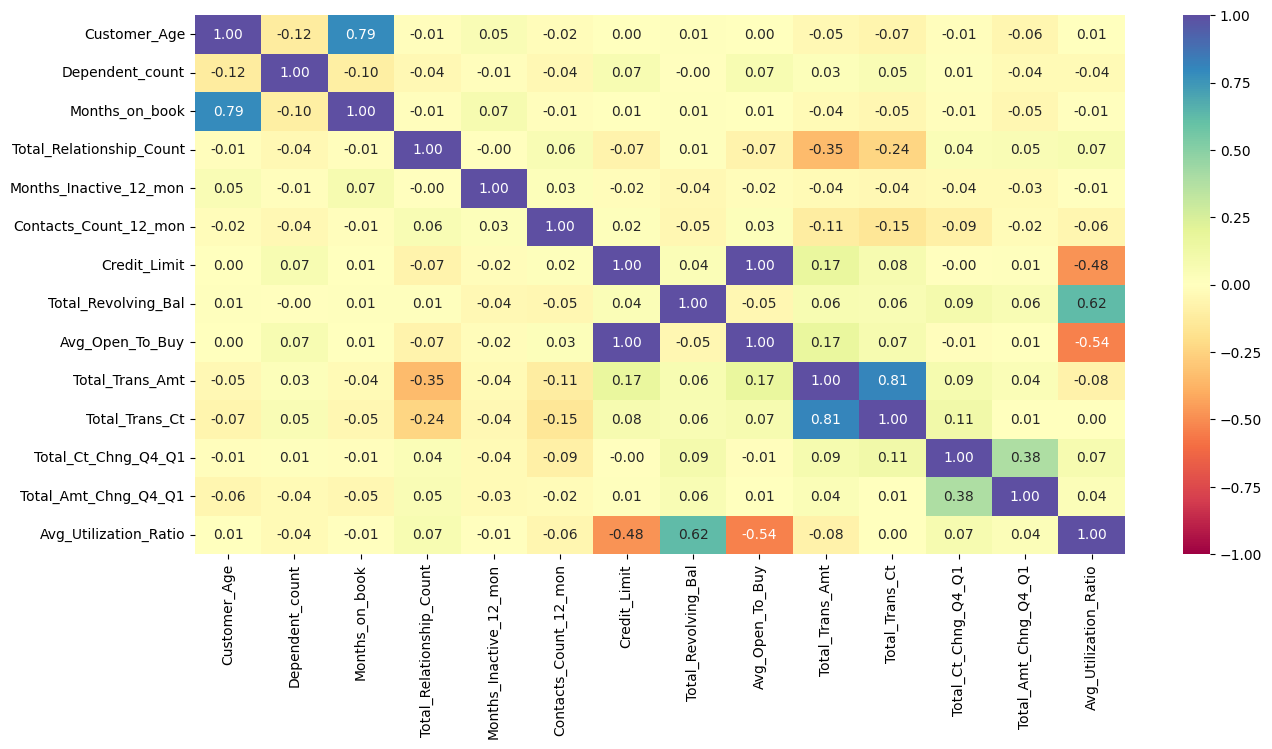

In [13]:
features_list = df[['Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count', 
                    'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 
                    'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Total_Amt_Chng_Q4_Q1', 'Avg_Utilization_Ratio']]
plt.figure(figsize=(15, 7))
sns.heatmap(features_list.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

- *Credit_Limit and Avg_Open_To_Buy have 100% correlation.*
- *Total_Trans_Amt and Total_Trans_Ct have strong correlation.*
- *Months_on_book and Customer_Age have strong correlation.*
- *Total_Revolving_Bal has some correlation with Avg_Utilization_Ratio*

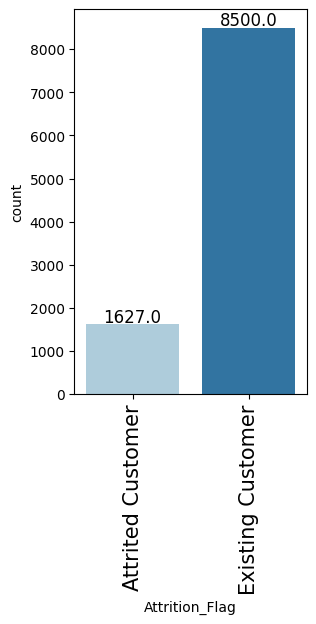

Attrition_Flag
Existing Customer   0.839
Attrited Customer   0.161
Name: proportion, dtype: float64

In [14]:
# Checking number of active accounts
labeled_barplot(df, 'Attrition_Flag')
df['Attrition_Flag'].value_counts(normalize=True)

- *16% of customers are not active and 84% of customers are active, the data is relatively balanced (attrited customers prevail more than 5%).*

### To jump to the appendix with detaled EDA, please click <a href = #link1>here</a>.

## Data Pre-processing

### Outlier Detection

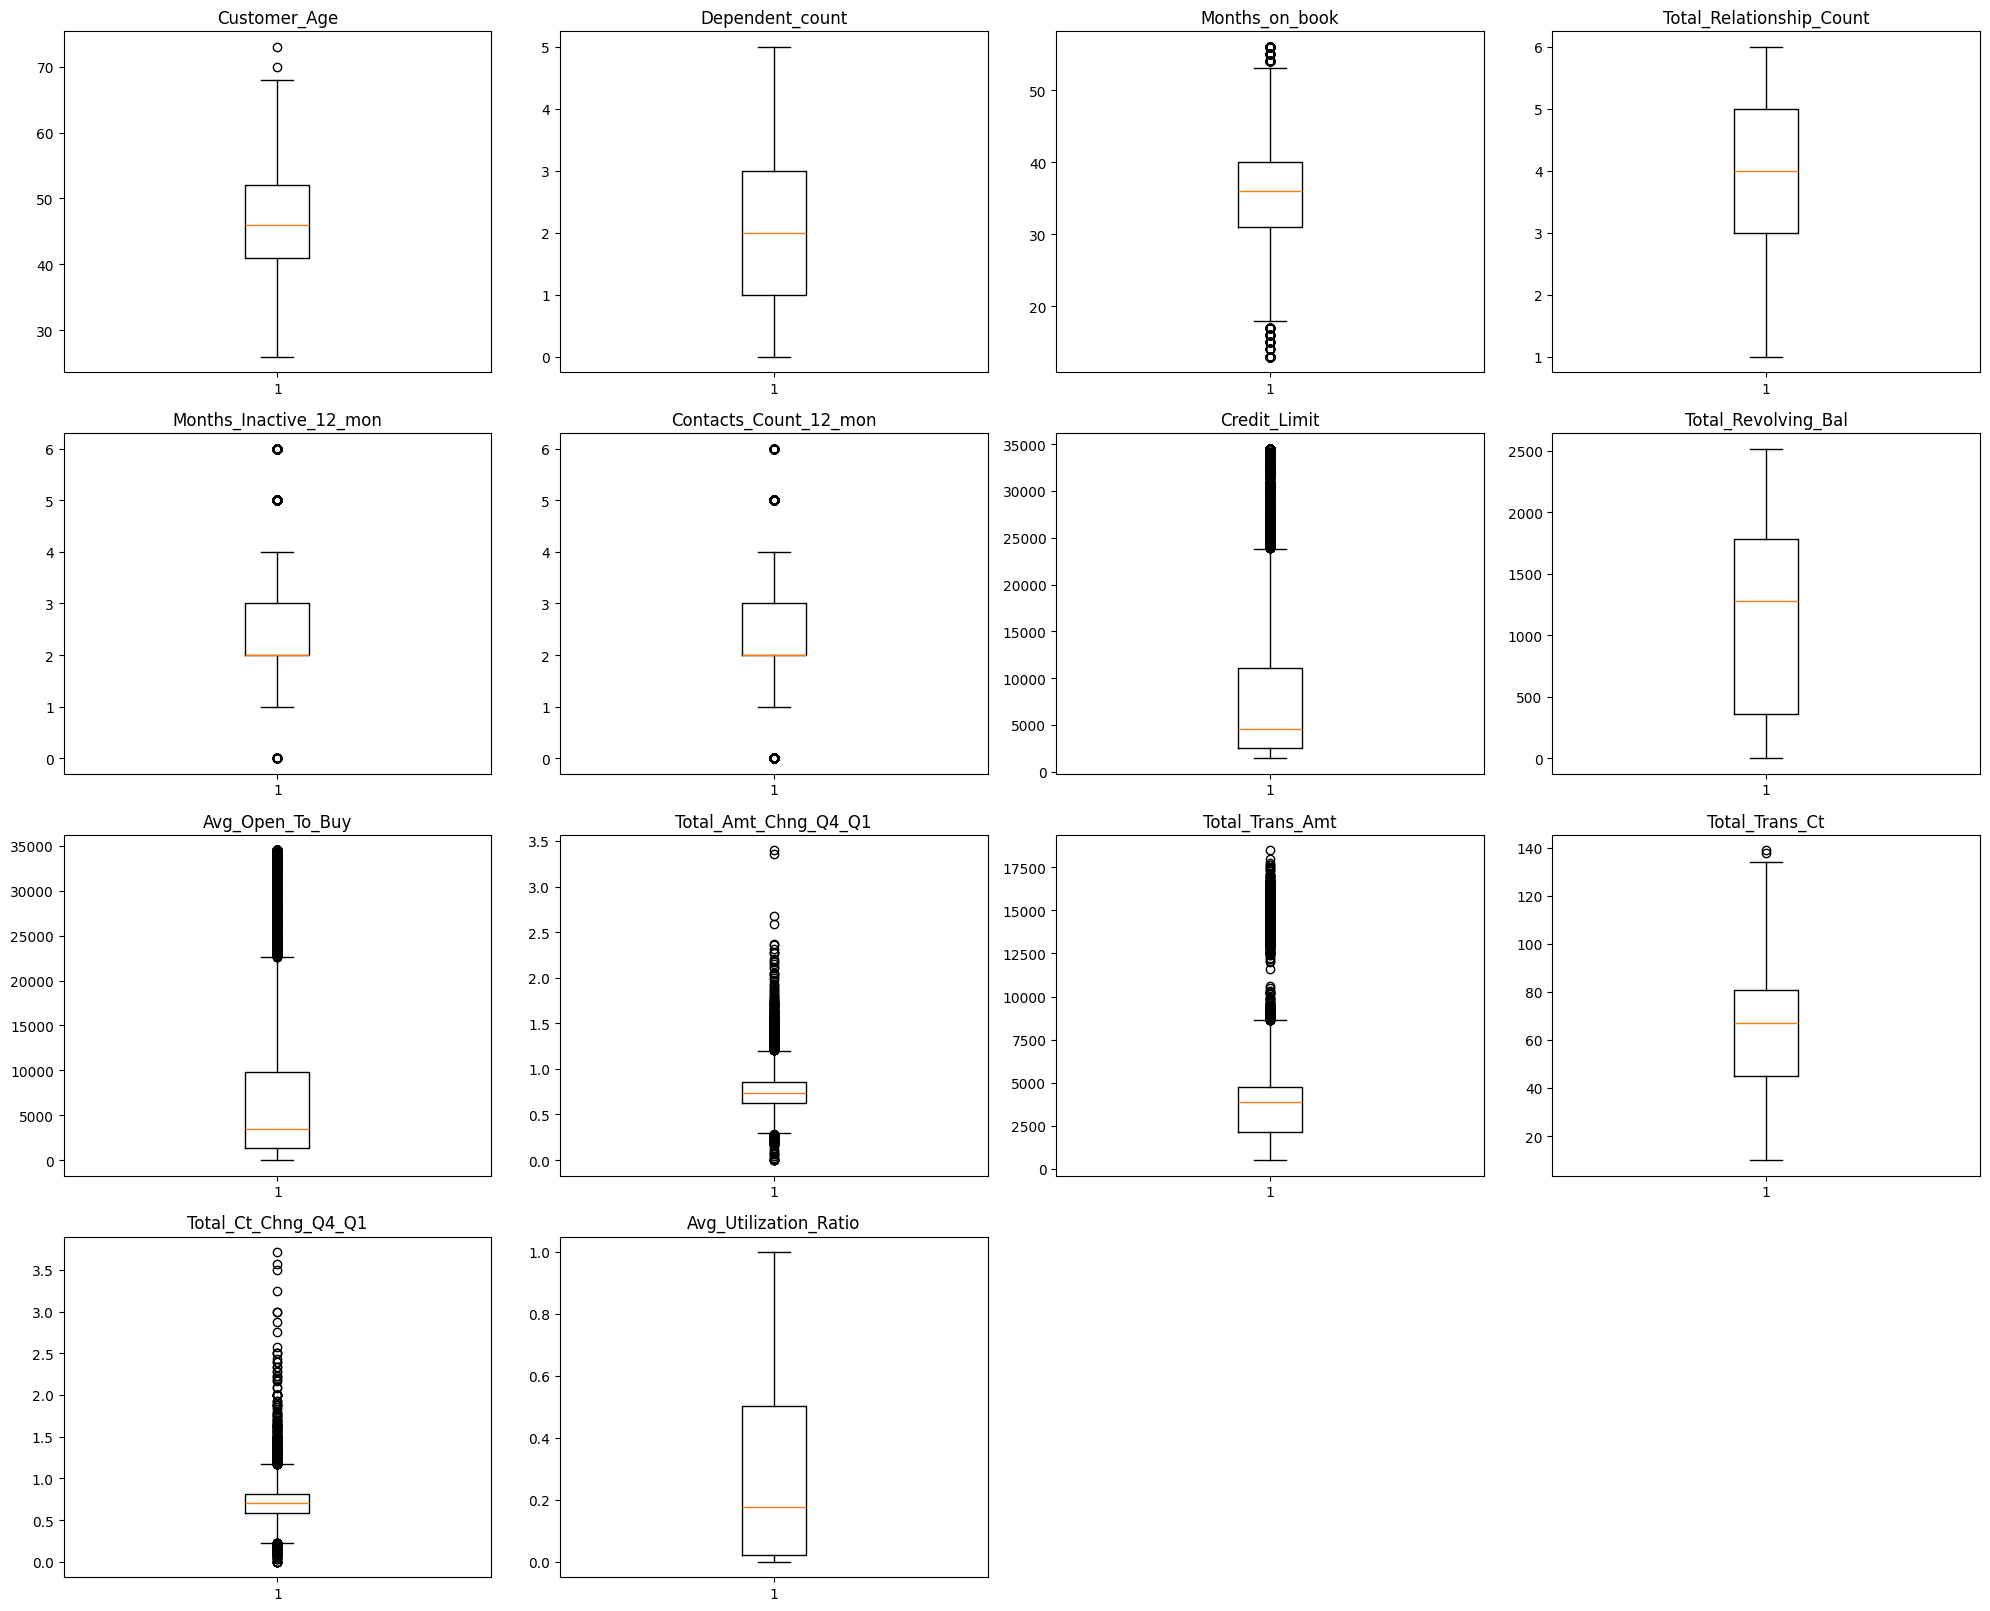

In [15]:
# plot outliers
numerical_col = df.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(20, 20))

for i, variable in enumerate(numerical_col):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

- *Customer_Age, Months_on_book, Months_Inactive_12_mon, Contacts_Count_12_mon, Credit_Limit, Avg_Open_To_Buy, Total_Trans_Amt, Total_Trans_Ct and Total_Ct_Chng_Q4_Q1 have outliers.*

### Outlier Treatment

In [16]:
# helper function to check outliers' percentage
def check_percent_out(df):

    """
    Check percentage of outliers in dataframe
    """

    Q1 = df.quantile(0.25)  # To find the 25th percentile
    Q3 = df.quantile(0.75)  # To find the 75th percentile
    IQR = Q3 - Q1  # Inter Quantile Range (75th perentile - 25th percentile)
    Lower_Whisker = Q1 - 1.5 * IQR
    Upper_Whisker = Q3 + 1.5 * IQR
    
    return ((df.select_dtypes(include=np.number) < Lower_Whisker) | (df.select_dtypes(include=np.number) > Upper_Whisker)).sum() / len(df) * 100

    
# helper function to treat outliers by flooring and capping
def treat_outliers(df, col):
    """
    Treats outliers in a variable

    df: dataframe
    col: dataframe column
    """
    Q1 = df[col].quantile(0.25)  # 25th quantile
    Q3 = df[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1
    Lower_Whisker = Q1 - 1.5 * IQR
    Upper_Whisker = Q3 + 1.5 * IQR

    # all the values smaller than Lower_Whisker will be assigned the value of Lower_Whisker
    # all the values greater than Upper_Whisker will be assigned the value of Upper_Whisker
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker,  axis=0)

    return df

In [17]:
# filtering numerical columns
filtered_num_col = df.select_dtypes(include=np.number).columns.tolist()

In [18]:
# printing percent of outliers
check_percent_out(df[filtered_num_col])

Customer_Age               0.020
Dependent_count            0.000
Months_on_book             3.812
Total_Relationship_Count   0.000
Months_Inactive_12_mon     3.268
Contacts_Count_12_mon      6.211
Credit_Limit               9.717
Total_Revolving_Bal        0.000
Avg_Open_To_Buy            9.509
Total_Amt_Chng_Q4_Q1       3.910
Total_Trans_Amt            8.848
Total_Trans_Ct             0.020
Total_Ct_Chng_Q4_Q1        3.891
Avg_Utilization_Ratio      0.000
dtype: float64

- *Some columns have up to 10 percent outliers, however, we will not treat them as they are proper values.*

### Feature Engineering

**We need to pass in numeric values for each categorical column so we can label and encode them. Let's now manually encode Income_Category and Attrition_Flag and then encode the rest of the categories using a single encoder before splitting the training and test sets.**

In [19]:
# creating the copy of the dataframe
df2 = df.copy()

In [20]:
df2.shape

(10127, 20)

In [21]:
# encoding Attrition_Flag into numbers
attrition = {
    "Existing Customer": 1,
     "Attrited Customer": 0
}

df2["Attrition_Flag"] = df2["Attrition_Flag"].map(attrition)
# encoding income range into numbers
income_category = {
    "abc": 0,
    "Less than $40K": 1,
    "$40K - $60K": 2,
    "$60K - $80K": 3,
    "$80K - $120K": 4,
    "$120K +": 5,
}

df2["Income_Category"] = df2["Income_Category"].map(income_category)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  int64  
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           8608 non-null   object 
 5   Marital_Status            9378 non-null   object 
 6   Income_Category           10127 non-null  int64  
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

In [22]:
df2.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,1,45,M,3,High School,Married,3,Blue,39,5,1,3,12691.000,777,11914.000,1.335,1144,42,1.625,0.061
1,1,49,F,5,Graduate,Single,1,Blue,44,6,1,2,8256.000,864,7392.000,1.541,1291,33,3.714,0.105
2,1,51,M,3,Graduate,Married,4,Blue,36,4,1,0,3418.000,0,3418.000,2.594,1887,20,2.333,0.000
3,1,40,F,4,High School,NaN,1,Blue,34,3,4,1,3313.000,2517,796.000,1.405,1171,20,2.333,0.760
4,1,40,M,3,Uneducated,Married,3,Blue,21,5,1,0,4716.000,0,4716.000,2.175,816,28,2.500,0.000


- *Attrition_Flag and Income_Category is mapped to tne numerical category.*

## Data Preparataion for model building

### Train-Test Split

-*To avoid the data leaking let's split train ant test data before missing values treatment:*

In [23]:
# creating the copy of the dataframe
df3 = df2.copy()

In [24]:
# Dividing train data into X and y
X = df3.drop(["Attrition_Flag"], axis=1)
y = df3["Attrition_Flag"]

In [25]:
# Splitting data into training and validation set:

# first we split data into 2 parts, say temporary and test
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1
)

# then we split the temporary set into train and validation
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.2, random_state=1
)

print(X_train.shape, X_val.shape, X_test.shape)

(6480, 19) (1621, 19) (2026, 19)


- *Split data have the same amount columns*

**Let's make the imputed split datasets:**

In [26]:
# Get list of categorical and numerical columns
cat_cols = list(X_train.select_dtypes(include='object').columns)
num_cols = list(X_train.select_dtypes(exclude='object').columns)

# Impute categorical columns
cat_imputer = SimpleImputer(strategy='most_frequent')
X_train[cat_cols] = cat_imputer.fit_transform(X_train[cat_cols])
X_val[cat_cols] = cat_imputer.transform(X_val[cat_cols])
X_test[cat_cols] = cat_imputer.transform(X_test[cat_cols])

# Impute numerical columns
num_imputer = SimpleImputer(strategy='mean')
X_train[num_cols] = num_imputer.fit_transform(X_train[num_cols])
X_val[num_cols] = num_imputer.transform(X_val[num_cols])
X_test[num_cols] = num_imputer.transform(X_test[num_cols])

In [27]:
# checking misssing values after imputation
print(X_train.isna().sum())
print("-" * 30)
print(X_val.isna().sum())
print("-" * 30)
print(X_test.isna().sum())
print(X_train.shape, X_val.shape, X_test.shape)

Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64
------------------------------
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal       

- *There is no missing values after imputation*

**Let's one-hot encode split datasets:**

In [28]:
# let's use pandas get-dummies function
X_train = pd.get_dummies(X_train, drop_first=True) # for train
X_val = pd.get_dummies(X_val, drop_first=True) # for val
X_test = pd.get_dummies(X_test, drop_first=True) # for test set
print(X_train.shape, X_val.shape, X_test.shape)

(6480, 26) (1621, 26) (2026, 26)


- *After one hot encoding, the column number is expanded from 19 to 26, the dimentions are slightly increased*

In [29]:
# Checking class balance for whole data, train set, validation set, and test set

print("Target value ratio in y")
print(y.value_counts(1))
print("*" * 80)
print("Target value ratio in y_train")
print(y_train.value_counts(1))
print("*" * 80)
print("Target value ratio in y_val")
print(y_val.value_counts(1))
print("*" * 80)
print("Target value ratio in y_test")
print(y_test.value_counts(1))
print("*" * 80)

Target value ratio in y
Attrition_Flag
1   0.839
0   0.161
Name: proportion, dtype: float64
********************************************************************************
Target value ratio in y_train
Attrition_Flag
1   0.840
0   0.160
Name: proportion, dtype: float64
********************************************************************************
Target value ratio in y_val
Attrition_Flag
1   0.841
0   0.159
Name: proportion, dtype: float64
********************************************************************************
Target value ratio in y_test
Attrition_Flag
1   0.837
0   0.163
Name: proportion, dtype: float64
********************************************************************************


- *The balance is still more than 10% and the data is ready for model building*

## Model Building

### Model evaluation criterion

The nature of predictions made by the classification model will translate as follows:

- True positives (TP) are failures correctly predicted by the model.
- False negatives (FN) are real failures in a generator where there is no detection by model.
- False positives (FP) are failure detections in a generator where there is no failure.

**Which metric to optimize?**

* We need to choose the metric which will ensure that the maximum number of generator failures are predicted correctly by the model.
* We would want Recall to be maximized as greater the Recall, the higher the chances of minimizing false negatives.
* We want to minimize false negatives because if a model predicts that a machine will have no failure when there will be a failure, it will increase the maintenance cost.

### Model Building with original data

**let's put the different models into models list:**

In [30]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GradientBoosting", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("dtree", DecisionTreeClassifier(random_state=1, class_weight='balanced')))
models.append(("XGBoost", XGBClassifier(random_state=1,eval_metric='logloss')))

In [31]:
# training models from models' list and counting recall
origin_val_scores = {} # keeps scores for the difference counting
origin_train_scores = {} # keeps scores for the difference counting

print("\nTraining Performance:\n")
for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_train, model.predict(X_train))
    origin_train_scores[name] = scores
    print("{}: {}".format(name, scores))

print("\nValidation Performance:\n")
for name, model in models:
    scores_val = recall_score(y_val, model.predict(X_val))
    origin_val_scores[name] = scores_val
    print("{}: {}".format(name, scores_val))

# counting training and validation difference to define the best perfomance 
print("\nTraining and Validation Performance Difference:\n")
for name, model in models:
    difference = origin_train_scores[name] - origin_val_scores[name]
    print("{}: Training Score: {:.4f}, Validation Score: {:.4f}, Difference: {:.4f}".format(name, origin_train_scores[name], origin_val_scores[name], difference))


Training Performance:

Bagging: 0.9987134717882742
Random forest: 1.0
GradientBoosting: 0.9931997794523065
Adaboost: 0.9829075537585003
dtree: 1.0
XGBoost: 1.0

Validation Performance:

Bagging: 0.9765395894428153
Random forest: 0.9897360703812317
GradientBoosting: 0.9897360703812317
Adaboost: 0.9824046920821115
dtree: 0.9611436950146628
XGBoost: 0.9882697947214076

Training and Validation Performance Difference:

Bagging: Training Score: 0.9987, Validation Score: 0.9765, Difference: 0.0222
Random forest: Training Score: 1.0000, Validation Score: 0.9897, Difference: 0.0103
GradientBoosting: Training Score: 0.9932, Validation Score: 0.9897, Difference: 0.0035
Adaboost: Training Score: 0.9829, Validation Score: 0.9824, Difference: 0.0005
dtree: Training Score: 1.0000, Validation Score: 0.9611, Difference: 0.0389
XGBoost: Training Score: 1.0000, Validation Score: 0.9883, Difference: 0.0117


- *Adaboost that has the best performance as the difference metric.*

### Model Building with Oversampled data


In [32]:
# Synthetic Minority Over Sampling Technique
print("Before Oversampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Oversampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

sm = SMOTE(
    sampling_strategy=1, k_neighbors=5, random_state=1
)  # Synthetic Minority Over Sampling Technique
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


print("After Oversampling, counts of label 'Yes': {}".format(sum(y_train_over == 1)))
print("After Oversampling, counts of label 'No': {} \n".format(sum(y_train_over == 0)))


print("After Oversampling, the shape of train_X: {}".format(X_train_over.shape))
print("After Oversampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before Oversampling, counts of label 'Yes': 5441
Before Oversampling, counts of label 'No': 1039 

After Oversampling, counts of label 'Yes': 5441
After Oversampling, counts of label 'No': 5441 

After Oversampling, the shape of train_X: (10882, 26)
After Oversampling, the shape of train_y: (10882,) 



In [33]:
# training models from models' list and counting recall for oversampled data

oversampled_train_scores = {} # keeps scores for the difference counting
oversampled_val_scores = {} # keeps scores for the difference counting

print("\nTraining Performance:\n")
for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores = recall_score(y_train_over, model.predict(X_train_over))
    oversampled_train_scores[name] = scores
    print("{}: {}".format(name, scores))

print("\nValidation Performance:\n")
for name, model in models:
    scores_val = recall_score(y_val, model.predict(X_val))
    oversampled_val_scores[name] = scores_val
    print("{}: {}".format(name, scores_val))

# counting training and validation difference to define the best perfomance 
print("\nTraining and Validation Performance Difference:\n")
for name, model in models:
    difference = oversampled_train_scores[name] - oversampled_val_scores[name]
    print("{}: Training Score: {:.4f}, Validation Score: {:.4f}, Difference: {:.4f}".format(name, oversampled_train_scores[name], oversampled_val_scores[name], difference))


Training Performance:

Bagging: 0.9966917845984195
Random forest: 1.0
GradientBoosting: 0.9795993383569197
Adaboost: 0.9647123690498071
dtree: 1.0
XGBoost: 1.0

Validation Performance:

Bagging: 0.9589442815249267
Random forest: 0.9831378299120235
GradientBoosting: 0.9750733137829912
Adaboost: 0.9582111436950147
dtree: 0.9457478005865103
XGBoost: 0.9846041055718475

Training and Validation Performance Difference:

Bagging: Training Score: 0.9967, Validation Score: 0.9589, Difference: 0.0377
Random forest: Training Score: 1.0000, Validation Score: 0.9831, Difference: 0.0169
GradientBoosting: Training Score: 0.9796, Validation Score: 0.9751, Difference: 0.0045
Adaboost: Training Score: 0.9647, Validation Score: 0.9582, Difference: 0.0065
dtree: Training Score: 1.0000, Validation Score: 0.9457, Difference: 0.0543
XGBoost: Training Score: 1.0000, Validation Score: 0.9846, Difference: 0.0154


- *GradientBoosting that has the best performance as the difference metric.*

### Model Building with Undersampled data

In [34]:
# Random undersampler for under sampling the data
rus = RandomUnderSampler(random_state=1, sampling_strategy=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

In [35]:
print("Before Under Sampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Under Sampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

print("After Under Sampling, counts of label 'Yes': {}".format(sum(y_train_un == 1)))
print("After Under Sampling, counts of label 'No': {} \n".format(sum(y_train_un == 0)))

print("After Under Sampling, the shape of train_X: {}".format(X_train_un.shape))
print("After Under Sampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before Under Sampling, counts of label 'Yes': 5441
Before Under Sampling, counts of label 'No': 1039 

After Under Sampling, counts of label 'Yes': 1039
After Under Sampling, counts of label 'No': 1039 

After Under Sampling, the shape of train_X: (2078, 26)
After Under Sampling, the shape of train_y: (2078,) 



In [36]:
# training models from models' list and counting recall for oversampled data

undersampled_train_scores = {} # keeps scores for the difference counting
undersampled_val_scores = {} # keeps scores for the difference counting

print("\nTraining Performance:\n")
for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores = recall_score(y_train_un, model.predict(X_train_un))
    undersampled_train_scores[name] = scores
    print("{}: {}".format(name, scores))

print("\nValidation Performance:\n")
for name, model in models:
    scores_val = recall_score(y_val, model.predict(X_val))
    undersampled_val_scores[name] = scores_val
    print("{}: {}".format(name, scores_val))

# counting training and validation difference to define the best perfomance 
print("\nTraining and Validation Performance Difference:\n")
for name, model in models:
    difference = undersampled_train_scores[name] - undersampled_val_scores[name]
    print("{}: Training Score: {:.4f}, Validation Score: {:.4f}, Difference: {:.4f}".format(name, undersampled_train_scores[name], undersampled_val_scores[name], difference))


Training Performance:

Bagging: 0.9923002887391723
Random forest: 1.0
GradientBoosting: 0.9788257940327237
Adaboost: 0.9547641963426372
dtree: 1.0
XGBoost: 1.0

Validation Performance:

Bagging: 0.8870967741935484
Random forest: 0.9237536656891495
GradientBoosting: 0.9347507331378299
Adaboost: 0.9134897360703812
dtree: 0.9098240469208211
XGBoost: 0.9406158357771262

Training and Validation Performance Difference:

Bagging: Training Score: 0.9923, Validation Score: 0.8871, Difference: 0.1052
Random forest: Training Score: 1.0000, Validation Score: 0.9238, Difference: 0.0762
GradientBoosting: Training Score: 0.9788, Validation Score: 0.9348, Difference: 0.0441
Adaboost: Training Score: 0.9548, Validation Score: 0.9135, Difference: 0.0413
dtree: Training Score: 1.0000, Validation Score: 0.9098, Difference: 0.0902
XGBoost: Training Score: 1.0000, Validation Score: 0.9406, Difference: 0.0594


- *Adaboost that has the best performance as the difference metric.*

### HyperparameterTuning

#### Sample Parameter Grids

**Note**

1. Sample parameter grids have been provided to do necessary hyperparameter tuning. These sample grids are expected to provide a balance between model performance improvement and execution time. One can extend/reduce the parameter grid based on execution time and system configuration.
  - Please note that if the parameter grid is extended to improve the model performance further, the execution time will increase


- For Gradient Boosting:

```
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "subsample":[0.7,0.9],
    "max_features":[0.5,0.7,1],
}
```

- For Adaboost:

```
param_grid = {
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}
```

- For Bagging Classifier:

```
param_grid = {
    'max_samples': [0.8,0.9,1],
    'max_features': [0.7,0.8,0.9],
    'n_estimators' : [30,50,70],
}
```
- For Random Forest:

```
param_grid = {
    "n_estimators": [50,110,25],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
}
```

- For Decision Trees:

```
param_grid = {
    'max_depth': np.arange(2,6),
    'min_samples_leaf': [1, 4, 7],
    'max_leaf_nodes' : [10, 15],
    'min_impurity_decrease': [0.0001,0.001]
}
```

- For XGBoost (optional):

```
param_grid={'n_estimators':np.arange(50,110,25),
            'scale_pos_weight':[1,2,5],
            'learning_rate':[0.01,0.1,0.05],
            'gamma':[1,3],
            'subsample':[0.7,0.9]
}
```

**Let's define a function to output different metrics (including recall) on the train and test set and a function to show confusion matrix so that we do not have to use the same code repetitively while evaluating models.**

In [37]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

#### let's define scoring metrics to compare parameter combinations

In [38]:
scorer = metrics.make_scorer(metrics.recall_score)

#### Decision tree:

#### Sample tuning method for Decision tree with original data

In [39]:
# defining model
Model = DecisionTreeClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {'max_depth': np.arange(2,6),
              'min_samples_leaf': [1, 4, 7],
              'max_leaf_nodes' : [10,15],
              'min_impurity_decrease': [0.0001,0.001] }

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'min_samples_leaf': 1, 'min_impurity_decrease': 0.001, 'max_leaf_nodes': 15, 'max_depth': 4} with CV score=0.9704094757737807:


**let's check perfomance of Desistion tree with tuned hyperparameters for origin dataset:**

In [40]:
# for origin set
tuned_dt_origin = DecisionTreeClassifier(
    max_depth= 4,
    min_samples_leaf= 1,
    max_leaf_nodes= 15,
    min_impurity_decrease= 0.001
)
tuned_dt_origin.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, max_leaf_nodes=15,
                       min_impurity_decrease=0.001)

In [41]:
# Checking the model's performance on the origin training set
tuned_dt_origin_train = model_performance_classification_sklearn(tuned_dt_origin, X_train, y_train)
tuned_dt_origin_train

,Accuracy,Recall,Precision,F1
0,0.929,0.979,0.939,0.959


In [42]:
# Checking the model's performance on the origin validation set
tuned_dt_origin_val = model_performance_classification_sklearn(tuned_dt_origin, X_val, y_val)
tuned_dt_origin_val

,Accuracy,Recall,Precision,F1
0,0.923,0.976,0.935,0.955


#### Sample tuning method for Decision tree with oversampled data

In [43]:
# defining model
Model = DecisionTreeClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {'max_depth': np.arange(2,6),
              'min_samples_leaf': [1, 4, 7],
              'max_leaf_nodes' : [10,15],
              'min_impurity_decrease': [0.0001,0.001] }

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over,y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'min_samples_leaf': 1, 'min_impurity_decrease': 0.001, 'max_leaf_nodes': 15, 'max_depth': 4} with CV score=0.9128862150920976:


**let's check perfomance of Desistion tree with tuned hyperparameters for oversampled dataset:**

In [44]:
# for oversampled set
tuned_dt_oversampled = DecisionTreeClassifier(
    max_depth= 4,
    min_samples_leaf= 1,
    max_leaf_nodes= 15,
    min_impurity_decrease= 0.001
)
tuned_dt_oversampled.fit(X_train_over, y_train_over)

DecisionTreeClassifier(max_depth=4, max_leaf_nodes=15,
                       min_impurity_decrease=0.001)

In [45]:
# Checking the model's performance on the oversampled training set
tuned_dt_oversampled_train = model_performance_classification_sklearn(tuned_dt_oversampled, X_train_over, y_train_over)
tuned_dt_oversampled_train

,Accuracy,Recall,Precision,F1
0,0.919,0.913,0.925,0.919


In [46]:
# Checking the model's performance on the oversampled validation set
tuned_dt_oversampled_val = model_performance_classification_sklearn(tuned_dt_oversampled, X_val, y_val)
tuned_dt_oversampled_val

,Accuracy,Recall,Precision,F1
0,0.888,0.891,0.974,0.931


#### Sample tuning method for Decision tree with undersampled data

In [47]:
# defining model
Model = DecisionTreeClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {'max_depth': np.arange(2,6),
              'min_samples_leaf': [1, 4, 7],
              'max_leaf_nodes' : [10,15],
              'min_impurity_decrease': [0.0001,0.001] }

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'min_samples_leaf': 7, 'min_impurity_decrease': 0.0001, 'max_leaf_nodes': 10, 'max_depth': 4} with CV score=0.904696209587514:


**let's check perfomance of Desistion tree with tuned hyperparameters for undersampled dataset:**

In [48]:
# for undersampled set
tuned_dt_undersampled = DecisionTreeClassifier(
    max_depth= 4,
    min_samples_leaf= 7,
    max_leaf_nodes= 10,
    min_impurity_decrease= 0.0001
)
tuned_dt_undersampled.fit(X_train_un, y_train_un)

DecisionTreeClassifier(max_depth=4, max_leaf_nodes=10,
                       min_impurity_decrease=0.0001, min_samples_leaf=7)

In [49]:
# Checking the model's performance on the undersampled training set
tuned_dt_undersampled_train = model_performance_classification_sklearn(tuned_dt_undersampled, X_train_un, y_train_un)
tuned_dt_undersampled_train

,Accuracy,Recall,Precision,F1
0,0.908,0.932,0.889,0.910


In [50]:
# Checking the model's performance on the undersampled validation set
tuned_dt_undersampled_val = model_performance_classification_sklearn(tuned_dt_undersampled, X_val, y_val)
tuned_dt_undersampled_val

,Accuracy,Recall,Precision,F1
0,0.896,0.897,0.977,0.935


#### Random forest:

#### Sample tuning method for Random forest with original data

In [51]:
# defining model
Model = RandomForestClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": [50,110,25],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
}

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 110, 'min_samples_leaf': 3, 'max_samples': 0.4, 'max_features': 'sqrt'} with CV score=0.9886058107816129:


**let's check perfomance of Random forest with tuned hyperparameters for origin dataset:**

In [52]:
# for origin set
tuned_rf_origin = RandomForestClassifier(
    n_estimators=110,
    min_samples_leaf=3,
    max_features='sqrt',
    max_samples=0.4
)
tuned_rf_origin.fit(X_train, y_train)

RandomForestClassifier(max_samples=0.4, min_samples_leaf=3, n_estimators=110)

In [53]:
# Checking the model's performance on the origin training set
tuned_rf_origin_train = model_performance_classification_sklearn(tuned_rf_origin, X_train, y_train)
tuned_rf_origin_train

,Accuracy,Recall,Precision,F1
0,0.974,0.995,0.974,0.985


In [54]:
# Checking the model's performance on the origin validation set
tuned_rf_origin_val = model_performance_classification_sklearn(tuned_rf_origin, X_val, y_val)
tuned_rf_origin_val

,Accuracy,Recall,Precision,F1
0,0.952,0.990,0.954,0.972


#### Sample tuning method for Random forest with oversampled data

In [55]:
# defining model
Model = RandomForestClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": [50,110,25],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
}

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over,y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 110, 'min_samples_leaf': 1, 'max_samples': 0.6, 'max_features': 'sqrt'} with CV score=0.9713285934208395:


**let's check perfomance of Random forest with tuned hyperparameters for oversampled dataset:**

In [56]:
# for oversampled set
tuned_rf_over = RandomForestClassifier(
    n_estimators=110,
    min_samples_leaf=1,
    max_features='sqrt',
    max_samples=0.6
)
tuned_rf_over.fit(X_train_over, y_train_over)

RandomForestClassifier(max_samples=0.6, n_estimators=110)

In [57]:
# Checking the model's performance on the oversampled training set
tuned_rf_over_train = model_performance_classification_sklearn(tuned_rf_over, X_train_over, y_train_over)
tuned_rf_over_train

,Accuracy,Recall,Precision,F1
0,0.999,0.998,1.000,0.999


In [58]:
# Checking the model's performance on the oversampled validation set
tuned_rf_over_val = model_performance_classification_sklearn(tuned_rf_over, X_val, y_val)
tuned_rf_over_val

,Accuracy,Recall,Precision,F1
0,0.961,0.979,0.975,0.977


#### Sample tuning method for Random forest with undersampled data

In [59]:
# defining model
Model = RandomForestClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": [50,110,25],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
}

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 110, 'min_samples_leaf': 1, 'max_samples': 0.6, 'max_features': 'sqrt'} with CV score=0.9268766257896692:


**let's check perfomance of Random forest with tuned hyperparameters for undersampled dataset:**

In [60]:
# for undersampled set
tuned_rf_under = RandomForestClassifier(
    n_estimators=110,
    min_samples_leaf=1,
    max_features='sqrt',
    max_samples=0.6
)
tuned_rf_under.fit(X_train_un, y_train_un)

RandomForestClassifier(max_samples=0.6, n_estimators=110)

In [61]:
# Checking the model's performance on the undersampled training set
tuned_rf_under_train = model_performance_classification_sklearn(tuned_rf_under, X_train_un, y_train_un)
tuned_rf_under_train

,Accuracy,Recall,Precision,F1
0,0.998,0.995,1.000,0.998


In [62]:
# Checking the model's performance on the undersampled validation set
tuned_rf_under_val = model_performance_classification_sklearn(tuned_rf_under, X_val, y_val)
tuned_rf_under_val

,Accuracy,Recall,Precision,F1
0,0.930,0.924,0.992,0.957


#### Bagging:

#### Sample tuning method for Bagging with original data

In [63]:
# defining model
Model = BaggingClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    'max_samples': [0.8,0.9,1],
    'max_features': [0.7,0.8,0.9],
    'n_estimators' : [30,50,70],
}

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 70, 'max_samples': 1, 'max_features': 0.8} with CV score=1.0:


**let's check perfomance of bagging with tuned hyperparameters for origin dataset:**

In [64]:
# for origin set
tuned_bag_origin = BaggingClassifier(
    n_estimators=70,
    max_features=0.8,
    max_samples=1
)
tuned_bag_origin.fit(X_train, y_train)

BaggingClassifier(max_features=0.8, max_samples=1, n_estimators=70)

In [65]:
# Checking the model's performance on the origin training set
tuned_bag_origin_train = model_performance_classification_sklearn(tuned_bag_origin, X_train, y_train)
tuned_bag_origin_train

,Accuracy,Recall,Precision,F1
0,0.840,1.000,0.840,0.913


In [66]:
# Checking the model's performance on the origin validation set
tuned_bag_origin_val = model_performance_classification_sklearn(tuned_bag_origin, X_val, y_val)
tuned_bag_origin_val

,Accuracy,Recall,Precision,F1
0,0.841,1.000,0.841,0.914


#### Sample tuning method for Bagging with oversampled data

In [67]:
# defining model
Model = BaggingClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    'max_samples': [0.8,0.9,1],
    'max_features': [0.7,0.8,0.9],
    'n_estimators' : [30,50,70],
}

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over,y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 70, 'max_samples': 1, 'max_features': 0.8} with CV score=1.0:


**let's check perfomance of Bagging with tuned hyperparameters for oversampled dataset:**

In [68]:
# for oversampled set
tuned_bag_over = BaggingClassifier(
    n_estimators=70,
    max_features=0.8,
    max_samples=1
)
tuned_bag_over.fit(X_train_over, y_train_over)

BaggingClassifier(max_features=0.8, max_samples=1, n_estimators=70)

In [69]:
# Checking the model's performance on the oversampled training set
tuned_bag_over_train = model_performance_classification_sklearn(tuned_bag_over, X_train_over, y_train_over)
tuned_bag_over_train

,Accuracy,Recall,Precision,F1
0,0.500,1.000,0.500,0.667


In [70]:
# Checking the model's performance on the oversampled validation set
tuned_bag_over_val = model_performance_classification_sklearn(tuned_bag_over, X_val, y_val)
tuned_bag_over_val

,Accuracy,Recall,Precision,F1
0,0.841,1.000,0.841,0.914


#### Sample tuning method for Random forest with undersampled data

In [71]:
# defining model
Model = BaggingClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    'max_samples': [0.8,0.9,1],
    'max_features': [0.7,0.8,0.9],
    'n_estimators' : [30,50,70],
}

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 70, 'max_samples': 0.8, 'max_features': 0.7} with CV score=0.9297473058342625:


**let's check perfomance of Bagging with tuned hyperparameters for undersampled dataset:**

In [72]:
# for undersampled set
tuned_bag_under = BaggingClassifier(
    n_estimators=70,
    max_features=0.7,
    max_samples=0.8
)
tuned_bag_under.fit(X_train_un, y_train_un)

BaggingClassifier(max_features=0.7, max_samples=0.8, n_estimators=70)

In [73]:
# Checking the model's performance on the undersampled training set
tuned_bag_under_train = model_performance_classification_sklearn(tuned_bag_under, X_train_un, y_train_un)
tuned_bag_under_train

,Accuracy,Recall,Precision,F1
0,1.000,1.000,1.000,1.000


In [74]:
# Checking the model's performance on the undersampled validation set
tuned_bag_under_val = model_performance_classification_sklearn(tuned_bag_under, X_val, y_val)
tuned_bag_under_val

,Accuracy,Recall,Precision,F1
0,0.922,0.916,0.991,0.952


#### Adaboost:

#### Sample tuning method for Adaboost with original data

In [75]:
# defining model
Model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "estimator": [
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 100, 'learning_rate': 0.1, 'estimator': DecisionTreeClassifier(max_depth=3, random_state=1)} with CV score=0.9893409360989575:


**let's check perfomance of Adaboost with tuned hyperparameters for origin dataset:**

In [76]:
# for origin set
tuned_ada_origin = AdaBoostClassifier(
    n_estimators=100,
    learning_rate=0.1,
    estimator=DecisionTreeClassifier(max_depth=3, random_state=1)
)
tuned_ada_origin.fit(X_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=3,
                                                    random_state=1),
                   learning_rate=0.1, n_estimators=100)

In [77]:
# Checking the model's performance on the origin training set
tuned_ada_origin_train = model_performance_classification_sklearn(tuned_ada_origin, X_train, y_train)
tuned_ada_origin_train

,Accuracy,Recall,Precision,F1
0,0.985,0.995,0.988,0.991


In [78]:
# Checking the model's performance on the origin validation set
tuned_ada_origin_val = model_performance_classification_sklearn(tuned_ada_origin, X_val, y_val)
tuned_ada_origin_val

,Accuracy,Recall,Precision,F1
0,0.970,0.990,0.974,0.982


#### Sample tuning method for Adaboost with oversampled data

In [79]:
# defining model
Model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "estimator": [
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over,y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 100, 'learning_rate': 0.1, 'estimator': DecisionTreeClassifier(max_depth=3, random_state=1)} with CV score=0.9843771944039323:


**let's check perfomance of AdaBoost with tuned hyperparameters for oversampled dataset:**

In [80]:
# for oversampled set
tuned_ada_over = AdaBoostClassifier(
    n_estimators=100,
    learning_rate=0.1,
    estimator=DecisionTreeClassifier(max_depth=3, random_state=1)
)
tuned_ada_over.fit(X_train_over, y_train_over)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=3,
                                                    random_state=1),
                   learning_rate=0.1, n_estimators=100)

In [81]:
# Checking the model's performance on the oversampled training set
tuned_ada_over_train = model_performance_classification_sklearn(tuned_ada_over, X_train_over, y_train_over)
tuned_ada_over_train

,Accuracy,Recall,Precision,F1
0,0.991,0.994,0.987,0.991


In [82]:
# Checking the model's performance on the oversampled validation set
tuned_ada_over_val = model_performance_classification_sklearn(tuned_ada_over, X_val, y_val)
tuned_ada_over_val

,Accuracy,Recall,Precision,F1
0,0.972,0.988,0.979,0.984


#### Sample tuning method for Adaboost with undersampled data

In [83]:
# defining model
Model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "estimator": [
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 100, 'learning_rate': 0.1, 'estimator': DecisionTreeClassifier(max_depth=3, random_state=1)} with CV score=0.9412950575994055:


**let's check perfomance of Adaboost with tuned hyperparameters for undersampled dataset:**

In [84]:
# for undersampled set
tuned_ada_under = AdaBoostClassifier(
    n_estimators=100,
    learning_rate=0.1,
    estimator=DecisionTreeClassifier(max_depth=3, random_state=1)
)
tuned_ada_under.fit(X_train_un, y_train_un)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=3,
                                                    random_state=1),
                   learning_rate=0.1, n_estimators=100)

In [85]:
# Checking the model's performance on the undersampled training set
tuned_ada_under_train = model_performance_classification_sklearn(tuned_ada_under, X_train_un, y_train_un)
tuned_ada_under_train

,Accuracy,Recall,Precision,F1
0,0.994,0.994,0.993,0.994


In [86]:
# Checking the model's performance on the undersampled validation set
tuned_ada_under_val = model_performance_classification_sklearn(tuned_ada_under, X_val, y_val)
tuned_ada_under_val

,Accuracy,Recall,Precision,F1
0,0.933,0.928,0.991,0.959


#### Gradient Boosting:

#### Sample tuning method for Gradient Boosting with original data

In [87]:
# defining model
Model = GradientBoostingClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "subsample":[0.7,0.9],
    "max_features":[0.5,0.7,1],
}

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.7, 'n_estimators': 50, 'max_features': 1, 'learning_rate': 0.05, 'init': AdaBoostClassifier(random_state=1)} with CV score=0.9987137416950251:


**let's check perfomance of Gradient Boosting with tuned hyperparameters for origin dataset:**

In [88]:
# for origin set
tuned_gb_origin = GradientBoostingClassifier(
    init=AdaBoostClassifier(random_state=1),
    n_estimators=50,
    learning_rate=0.05,
    subsample=0.7,
    max_features=1,
)
tuned_gb_origin.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           learning_rate=0.05, max_features=1, n_estimators=50,
                           subsample=0.7)

In [89]:
# Checking the model's performance on the origin training set
tuned_gb_origin_train = model_performance_classification_sklearn(tuned_gb_origin, X_train, y_train)
tuned_gb_origin_train

,Accuracy,Recall,Precision,F1
0,0.865,0.999,0.862,0.926


In [90]:
# Checking the model's performance on the origin validation set
tuned_gb_origin_val = model_performance_classification_sklearn(tuned_gb_origin, X_val, y_val)
tuned_gb_origin_val

,Accuracy,Recall,Precision,F1
0,0.871,0.999,0.868,0.929


#### Sample tuning method for Gradient Boosting with oversampled data

In [91]:
# defining model
Model = GradientBoostingClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "subsample":[0.7,0.9],
    "max_features":[0.5,0.7,1],
}

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over,y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.7, 'n_estimators': 100, 'max_features': 0.7, 'learning_rate': 0.05, 'init': DecisionTreeClassifier(random_state=1)} with CV score=0.9455988697131745:


**let's check perfomance of Gradient Boosting tuned hyperparameters for oversampled dataset:**

In [92]:
# for oversampled set
tuned_gb_over = GradientBoostingClassifier(
    init=DecisionTreeClassifier(random_state=1),
    n_estimators=100,
    learning_rate=0.05,
    subsample=0.7,
    max_features=0.7,
)
tuned_gb_over.fit(X_train_over, y_train_over)

GradientBoostingClassifier(init=DecisionTreeClassifier(random_state=1),
                           learning_rate=0.05, max_features=0.7, subsample=0.7)

In [93]:
# Checking the model's performance on the oversampled training set
tuned_gb_over_train = model_performance_classification_sklearn(tuned_gb_over, X_train_over, y_train_over)
tuned_gb_over_train

,Accuracy,Recall,Precision,F1
0,1.000,1.000,1.000,1.000


In [94]:
# Checking the model's performance on the oversampled validation set
tuned_gb_over_val = model_performance_classification_sklearn(tuned_gb_over, X_val, y_val)
tuned_gb_over_val

,Accuracy,Recall,Precision,F1
0,0.928,0.946,0.968,0.957


#### Sample tuning method for GradientBoosting with undersampled data

In [95]:
# defining model
Model = GradientBoostingClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "subsample":[0.7,0.9],
    "max_features":[0.5,0.7,1],
}

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.7, 'n_estimators': 100, 'max_features': 0.7, 'learning_rate': 0.05, 'init': DecisionTreeClassifier(random_state=1)} with CV score=0.8951040505388331:


**let's check perfomance of Gradient Boosting with tuned hyperparameters for undersampled dataset:**

In [96]:
# for undersampled set
tuned_gb_under = GradientBoostingClassifier(
    init=DecisionTreeClassifier(random_state=1),
    n_estimators=100,
    learning_rate=0.05,
    subsample=0.7,
    max_features=0.7,
)
tuned_gb_under.fit(X_train_un, y_train_un)

GradientBoostingClassifier(init=DecisionTreeClassifier(random_state=1),
                           learning_rate=0.05, max_features=0.7, subsample=0.7)

In [97]:
# Checking the model's performance on the undersampled training set
tuned_gb_under_train = model_performance_classification_sklearn(tuned_gb_under, X_train_un, y_train_un)
tuned_gb_under_train

,Accuracy,Recall,Precision,F1
0,1.000,1.000,1.000,1.000


In [98]:
# Checking the model's performance on the undersampled validation set
tuned_gb_under_val = model_performance_classification_sklearn(tuned_gb_under, X_val, y_val)
tuned_gb_under_val

,Accuracy,Recall,Precision,F1
0,0.906,0.910,0.977,0.942


#### XGBoost:

#### Sample tuning method for XGBoost with original data

In [99]:
# defining model
Model = XGBClassifier()

# Parameter grid to pass in RandomSearchCV
param_grid={'n_estimators':np.arange(50,110,25),
            'scale_pos_weight':[1,2,5],
            'learning_rate':[0.01,0.1,0.05],
            'gamma':[1,3],
            'subsample':[0.7,0.9]
}

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.9, 'scale_pos_weight': 1, 'n_estimators': 50, 'learning_rate': 0.01, 'gamma': 3} with CV score=1.0:


**let's check perfomance of XGBoost with tuned hyperparameters for origin dataset:**

In [100]:
# for origin set
tuned_xgb_origin = XGBClassifier(
    subsample=0.9,
    scale_pos_weight=1,
    n_estimators=50,
    learning_rate=0.01,
    gamma=3,
)
tuned_xgb_origin.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=3, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [101]:
# Checking the model's performance on the origin training set
tuned_xgb_origin_train = model_performance_classification_sklearn(tuned_xgb_origin, X_train, y_train)
tuned_xgb_origin_train

,Accuracy,Recall,Precision,F1
0,0.850,1.000,0.849,0.918


In [102]:
# Checking the model's performance on the origin validation set
tuned_xgb_origin_val = model_performance_classification_sklearn(tuned_xgb_origin, X_val, y_val)
tuned_xgb_origin_val

,Accuracy,Recall,Precision,F1
0,0.848,1.000,0.847,0.917


#### Sample tuning method for XGBoost with oversampled data

In [103]:
# defining model
Model = XGBClassifier()

# Parameter grid to pass in RandomSearchCV
param_grid={'n_estimators':np.arange(50,110,25),
            'scale_pos_weight':[1,2,5],
            'learning_rate':[0.01,0.1,0.05],
            'gamma':[1,3],
            'subsample':[0.7,0.9]
}

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over,y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.7, 'scale_pos_weight': 5, 'n_estimators': 100, 'learning_rate': 0.1, 'gamma': 3} with CV score=0.9920969386377141:


**let's check perfomance of XGBoost tuned hyperparameters for oversampled dataset:**

In [104]:
# for oversampled set
tuned_xgb_over = XGBClassifier(
    subsample=0.7,
    scale_pos_weight=5,
    n_estimators=100,
    learning_rate=0.1,
    gamma=3,
)
tuned_xgb_over.fit(X_train_over, y_train_over)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=3, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [105]:
# Checking the model's performance on the oversampled training set
tuned_xgb_over_train = model_performance_classification_sklearn(tuned_xgb_over, X_train_over, y_train_over)
tuned_xgb_over_train

,Accuracy,Recall,Precision,F1
0,0.992,1.000,0.985,0.992


In [106]:
# Checking the model's performance on the oversampled validation set
tuned_xgb_over_val = model_performance_classification_sklearn(tuned_xgb_over, X_val, y_val)
tuned_xgb_over_val

,Accuracy,Recall,Precision,F1
0,0.962,0.993,0.964,0.978


#### Sample tuning method for XGBoost with undersampled data

In [107]:
# defining model
Model = XGBClassifier()

# Parameter grid to pass in RandomSearchCV
param_grid={'n_estimators':np.arange(50,110,25),
            'scale_pos_weight':[1,2,5],
            'learning_rate':[0.01,0.1,0.05],
            'gamma':[1,3],
            'subsample':[0.7,0.9]
}

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.7, 'scale_pos_weight': 5, 'n_estimators': 100, 'learning_rate': 0.1, 'gamma': 3} with CV score=0.9740198810850984:


**let's check perfomance of XGBoost with tuned hyperparameters for undersampled dataset:**

In [108]:
# for undersampled set
tuned_xgb_under = XGBClassifier(
    subsample=0.7,
    scale_pos_weight=5,
    n_estimators=100,
    learning_rate=0.1,
    gamma=3,
)
tuned_xgb_under.fit(X_train_un, y_train_un)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=3, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [109]:
# Checking the model's performance on the undersampled training set
tuned_xgb_under_train = model_performance_classification_sklearn(tuned_xgb_under, X_train_un, y_train_un)
tuned_xgb_under_train

,Accuracy,Recall,Precision,F1
0,0.984,0.999,0.970,0.984


In [110]:
# Checking the model's performance on the undersampled validation set
tuned_xgb_under_val = model_performance_classification_sklearn(tuned_xgb_under, X_val, y_val)
tuned_xgb_under_val

,Accuracy,Recall,Precision,F1
0,0.956,0.963,0.984,0.974


- *Having received different models with variations in tuned hyperparameters, let's further compare the models and choose the one with the best performance:*

## Model Comparison and Final Model Selection

**let's check perfomance of the models on trainig sets:**

In [111]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        tuned_dt_origin_train.T,
        tuned_dt_oversampled_train.T,
        tuned_dt_undersampled_train.T,
        tuned_rf_origin_train.T,
        tuned_rf_over_train.T,
        tuned_rf_under_train.T,
        tuned_bag_origin_train.T,
        tuned_bag_over_train.T,
        tuned_bag_under_train.T,
        tuned_ada_origin_train.T,
        tuned_ada_over_train.T,
        tuned_ada_under_train.T,
        tuned_gb_origin_train.T,
        tuned_gb_over_train.T,
        tuned_gb_under_train.T,
        tuned_xgb_origin_train.T,
        tuned_xgb_over_train.T,
        tuned_xgb_under_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "DT Original data",
    "DT Oversampled data",
    "DT Undersampled data",
    "RF Original data",
    "RF Oversampled data",
    "RF Undersampled data",
    "Bagging Original data",
    "Bagging Oversampled data",
    "Bagging Undersampled data",
    "AdaBoost Original data",
    "AdaBoost Oversampled data",
    "AdaBoost Undersampled data",
    "GB Original data",
    "GB Oversampled data",
    "GB Undersampled data",
    "XGB Original data",
    "XGB Oversampled data",
    "XGB Undersampled data",
    
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,DT Original data,DT Oversampled data,DT Undersampled data,RF Original data,RF Oversampled data,RF Undersampled data,Bagging Original data,Bagging Oversampled data,Bagging Undersampled data,AdaBoost Original data,AdaBoost Oversampled data,AdaBoost Undersampled data,GB Original data,GB Oversampled data,GB Undersampled data,XGB Original data,XGB Oversampled data,XGB Undersampled data
Accuracy,0.929,0.919,0.908,0.974,0.999,0.998,0.840,0.500,1.000,0.985,0.991,0.994,0.865,1.000,1.000,0.850,0.992,0.984
Recall,0.979,0.913,0.932,0.995,0.998,0.995,1.000,1.000,1.000,0.995,0.994,0.994,0.999,1.000,1.000,1.000,1.000,0.999
Precision,0.939,0.925,0.889,0.974,1.000,1.000,0.840,0.500,1.000,0.988,0.987,0.993,0.862,1.000,1.000,0.849,0.985,0.970
F1,0.959,0.919,0.910,0.985,0.999,0.998,0.913,0.667,1.000,0.991,0.991,0.994,0.926,1.000,1.000,0.918,0.992,0.984


**let's check perfomance of Decision tree models on validation sets:**

In [112]:
# validation performance comparison

models_val_comp_df = pd.concat(
    [
        tuned_dt_origin_val.T,
        tuned_dt_oversampled_val.T,
        tuned_dt_undersampled_val.T,
        tuned_rf_origin_val.T,
        tuned_rf_over_val.T,
        tuned_rf_under_val.T,
        tuned_bag_origin_val.T,
        tuned_bag_over_val.T,
        tuned_bag_under_val.T,
        tuned_ada_origin_val.T,
        tuned_ada_over_val.T,
        tuned_ada_under_val.T,
        tuned_gb_origin_val.T,
        tuned_gb_over_val.T,
        tuned_gb_under_val.T,
        tuned_xgb_origin_val.T,
        tuned_xgb_over_val.T,
        tuned_xgb_under_val.T,
    ],
    axis=1,
)
models_val_comp_df.columns = [
    "DT Original data",
    "DT Oversampled data",
    "DT Undersampled data",
    "RF Original data",
    "RF Oversampled data",
    "RF Undersampled data",
    "Bagging Original data",
    "Bagging Oversampled data",
    "Bagging Undersampled data",
    "AdaBoost Original data",
    "AdaBoost Oversampled data",
    "AdaBoost Undersampled data",
    "GB Original data",
    "GB Oversampled data",
    "GB Undersampled data",
    "XGB Original data",
    "XGB Oversampled data",
    "XGB Undersampled data",
    
]

print("Valiation performance comparison:")
models_val_comp_df

Valiation performance comparison:


,DT Original data,DT Oversampled data,DT Undersampled data,RF Original data,RF Oversampled data,RF Undersampled data,Bagging Original data,Bagging Oversampled data,Bagging Undersampled data,AdaBoost Original data,AdaBoost Oversampled data,AdaBoost Undersampled data,GB Original data,GB Oversampled data,GB Undersampled data,XGB Original data,XGB Oversampled data,XGB Undersampled data
Accuracy,0.923,0.888,0.896,0.952,0.961,0.930,0.841,0.841,0.922,0.970,0.972,0.933,0.871,0.928,0.906,0.848,0.962,0.956
Recall,0.976,0.891,0.897,0.990,0.979,0.924,1.000,1.000,0.916,0.990,0.988,0.928,0.999,0.946,0.910,1.000,0.993,0.963
Precision,0.935,0.974,0.977,0.954,0.975,0.992,0.841,0.841,0.991,0.974,0.979,0.991,0.868,0.968,0.977,0.847,0.964,0.984
F1,0.955,0.931,0.935,0.972,0.977,0.957,0.914,0.914,0.952,0.982,0.984,0.959,0.929,0.957,0.942,0.917,0.978,0.974


- *AdaBoost model trained with oversampled data has generalised performance, so let's consider it as the best model.*

### Test set final performance

**Now we have our final model, so let's find out how our final model is performing on unseen test data.**

In [113]:
# Let's check the performance on test set
ada_test = model_performance_classification_sklearn(tuned_ada_over, X_test, y_test)
ada_test

,Accuracy,Recall,Precision,F1
0,0.971,0.984,0.981,0.983


- *The Adaboost model trained on oversampled data has given ~98% recall on the test set*
- *This performance is in line with what we achieved with this model on the train and validation sets, so this is a generalized model*

### Feature Importance

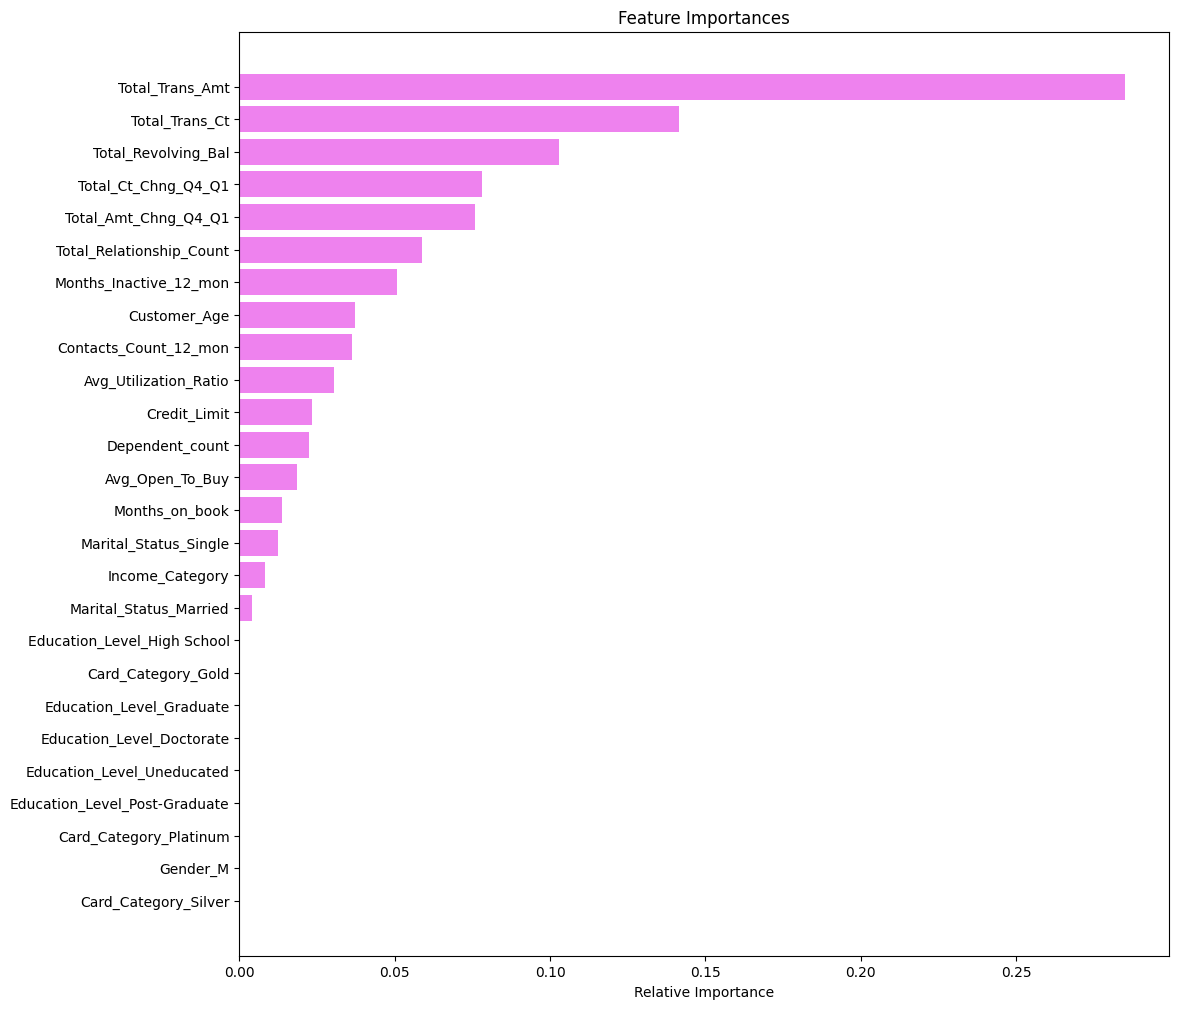

In [114]:
feature_names = X_train.columns
importances = tuned_ada_over.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

- *Total_Trans_Amt, Total_Trans_Ct, Total_Revolving_Bal and Total_Relationship_Count are the most important features for making predictions.*

# Business Insights and Conclusions

* Customers who have fewer interactions with the bank in the last 12 months are more likely to leave. The bank should focus on increasing engagement through targeted communication, personalized offers, and proactive customer service.
* Customers with high revolving balances or low average open-to-buy ratios are at a higher risk of attrition. Encouraging responsible credit card usage and offering financial management tools can help customers monitor their spending and debt levels.
* Promotion the benefits of card membership such as rewards programs, cashback incentives, and exclusive discounts. Highlighting the value proposition can encourage customers to continue using their credit cards.
* Analyzing customer's spending patterns to create personalized offers and services that cater to specific needs and preferences. This could include customized credit limits, card features, and promotional offers based on individual behavior.
* Implementing targeted retention campaigns to identify at-risk customers and proactively address their concerns before they decide to leave. This could involve personalized outreach, loyalty rewards, or special incentives to encourage continued engagement.
* Encouraging customers to provide feedback through surveys, reviews, or customer support channels. Use this data to continuously improve service offerings.
* Thera Bank can significantly reduce attrition rates and improve customer retention by implementing a strategic approach that focuses on enhancing engagement, optimizing financial management, customizing product offerings, and refining communication strategies. The bank can foster long-term relationships with its customers and maintain a competitive edge in the market.
* Utilizing predictive modeling techniques such as classification algorithms to identify customers at risk of churn based on historical transaction data and behavioral patterns.
* Dividing customers into distinct segments based on their likelihood of churn and tailor retention strategies accordingly.

## <a name='link1'>Appendix: Detailed Exploratory Data Analysis (EDA)</a>

#### The below functions need to be defined to carry out the Exploratory Data Analysis.

### Univariate analysis

**Let's check some categorical distribution summaries**

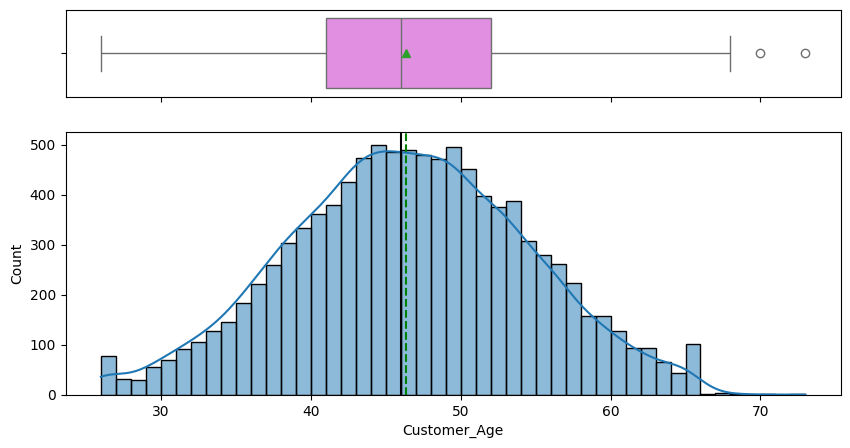

In [115]:
# Checking the distribution of'Customer_Age' column:
histogram_boxplot(df, 'Customer_Age', figsize=(10,5), kde = True)

- *Averaged age of the customers is 46.3 year*
- *The distribution is symmetric*

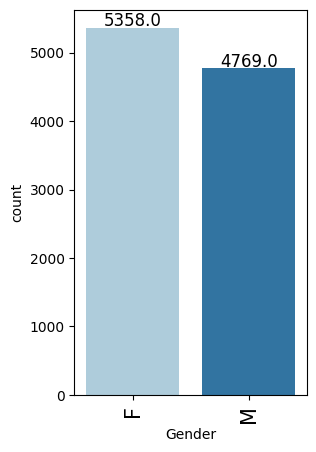

Gender
F   0.529
M   0.471
Name: proportion, dtype: float64

In [116]:
# Counting gender of the account holders
labeled_barplot(df, 'Gender')
df['Gender'].value_counts(normalize=True)

- *53% of the customers are female*

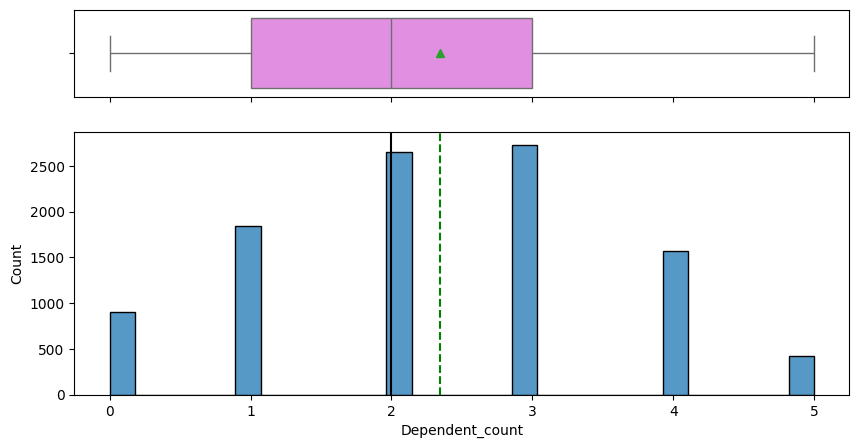

In [117]:
# Checking the distribution of 'Dependent_count' column:
histogram_boxplot(df,'Dependent_count', figsize=(10,5), discrete=True)

- *The averaged numbers are two dependents*

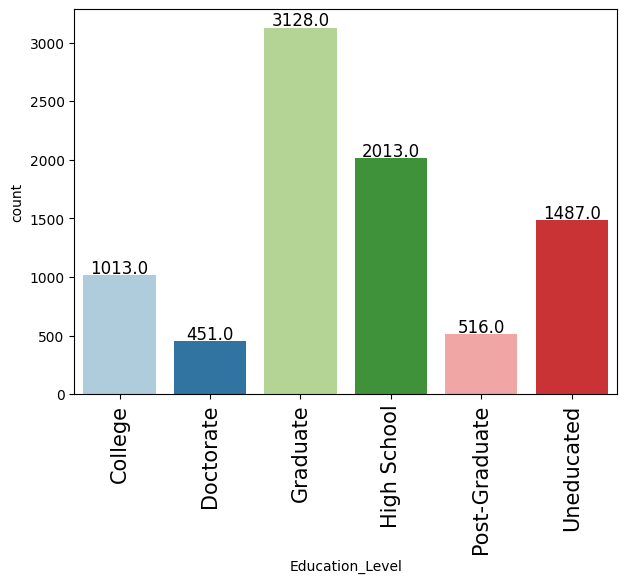

Education_Level
Graduate        0.363
High School     0.234
Uneducated      0.173
College         0.118
Post-Graduate   0.060
Doctorate       0.052
Name: proportion, dtype: float64

In [118]:
# Counting education of the account holders
labeled_barplot(df, 'Education_Level')
df['Education_Level'].value_counts(normalize=True)

- *Most of the customers have graduated 36% and high school 24% level of education*

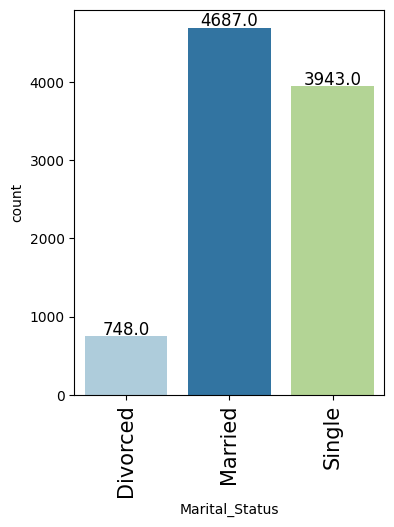

Marital_Status
Married    0.500
Single     0.420
Divorced   0.080
Name: proportion, dtype: float64

In [119]:
# Counting marital status of the account holders
labeled_barplot(df, 'Marital_Status')
df['Marital_Status'].value_counts(normalize=True)

- *Most of the customers are married 50% and are single 42%*

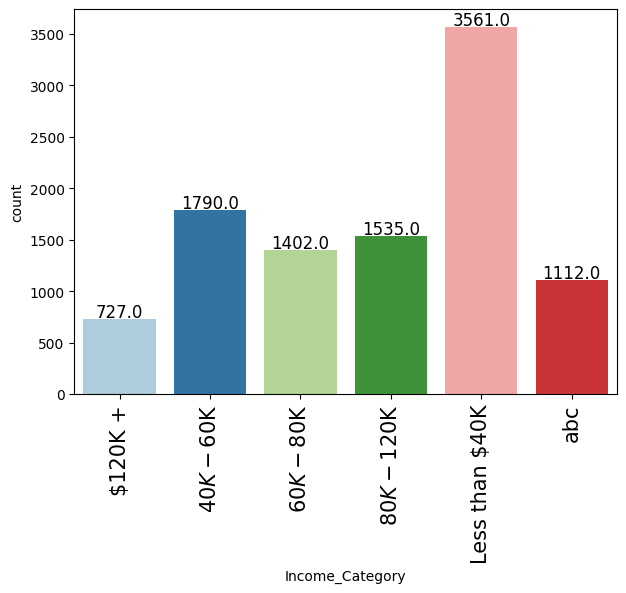

Income_Category
Less than $40K   0.352
$40K - $60K      0.177
$80K - $120K     0.152
$60K - $80K      0.138
abc              0.110
$120K +          0.072
Name: proportion, dtype: float64

In [120]:
# Counting income category of the account holders
labeled_barplot(df, 'Income_Category')
df['Income_Category'].value_counts(normalize=True)

- *35% of customers have income less than 40K dollars, only 7.2% of customers have income more than 120K dollars*

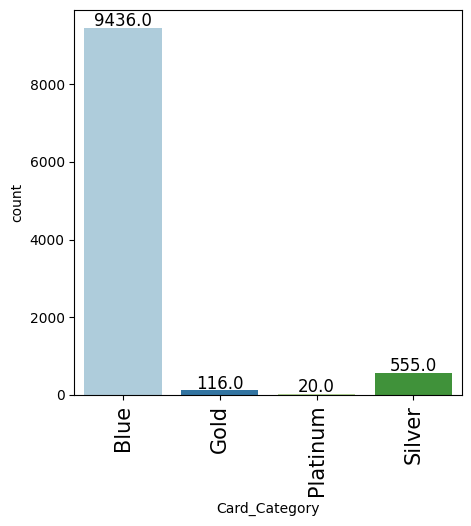

Card_Category
Blue       0.932
Silver     0.055
Gold       0.011
Platinum   0.002
Name: proportion, dtype: float64

In [121]:
# Counting card category of the account holders
labeled_barplot(df, 'Card_Category')
df['Card_Category'].value_counts(normalize=True)

- *93% of customers have blue type of the card*

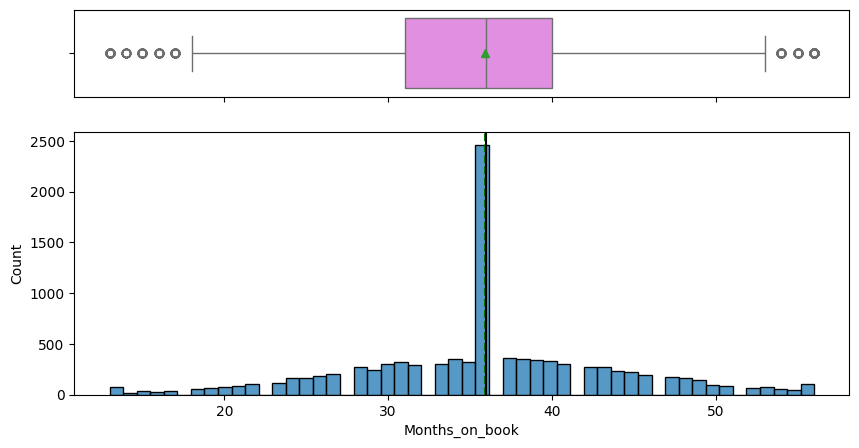

In [122]:
# Checking the distribution of period of relationship with the bank:
histogram_boxplot(df,'Months_on_book', figsize=(10,5), discrete=True)

- *The average period of the relationship is 36 months, the distribution has some anomaly spike on the averaged value*

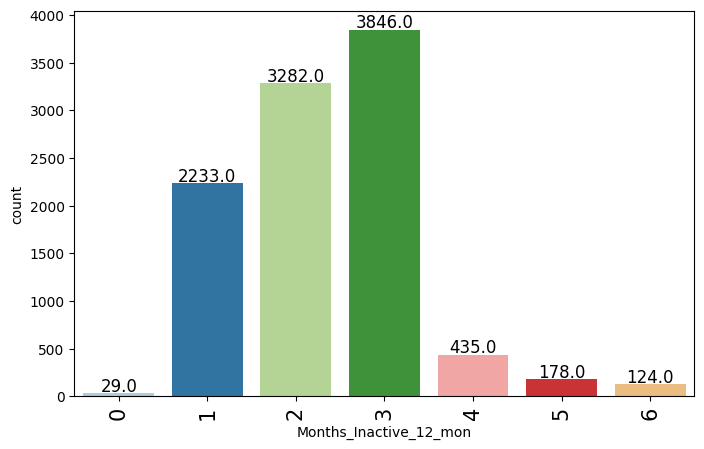

Months_Inactive_12_mon
3   0.380
2   0.324
1   0.220
4   0.043
5   0.018
6   0.012
0   0.003
Name: proportion, dtype: float64

In [123]:
# Counting months inactive in the last 12 months
labeled_barplot(df, 'Months_Inactive_12_mon')
df['Months_Inactive_12_mon'].value_counts(normalize=True)

- *First, second and third monts are most inactive.*

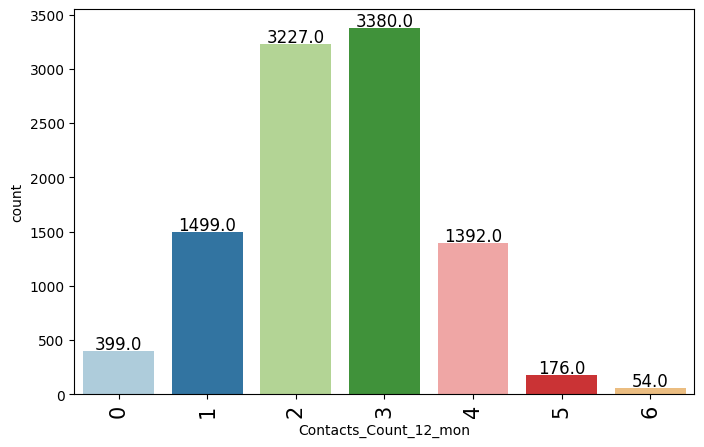

Contacts_Count_12_mon
3   0.334
2   0.319
1   0.148
4   0.137
0   0.039
5   0.017
6   0.005
Name: proportion, dtype: float64

In [124]:
# Counting no. of contacts between the customer and bank in the last 12 months
labeled_barplot(df, 'Contacts_Count_12_mon')
df['Contacts_Count_12_mon'].value_counts(normalize=True)

- *Most of the contacts occur 2 and 3 times*

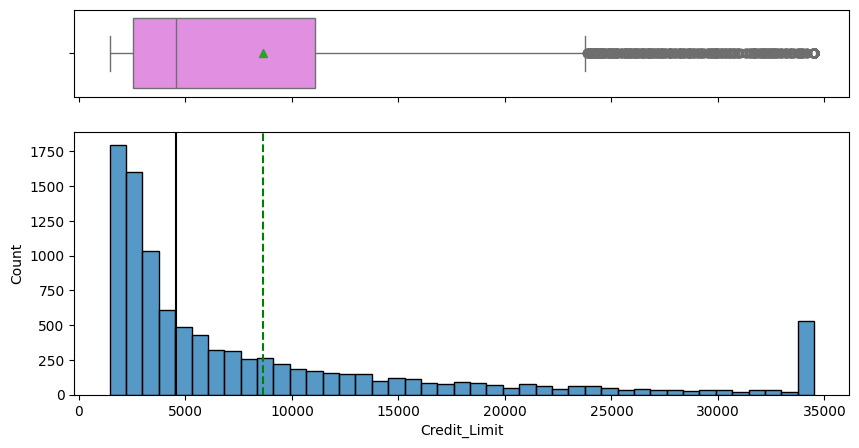

In [125]:
# Checking a credit Limit on the credit card
# Checking the distribution of period of relationship with the bank:
histogram_boxplot(df,'Credit_Limit', figsize=(10,5), discrete=True)

- *The distribution of the credit limit is right-skewed with outliers after ~23000 dollars*

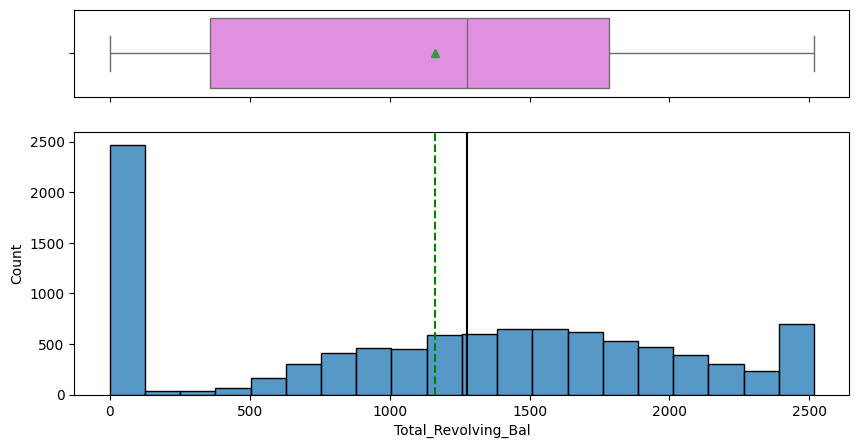

In [126]:
# Checking the distribution of revolving balance
histogram_boxplot(df,'Total_Revolving_Bal', figsize=(10,5), discrete=True)

- *Averaged value of the total revolving balance is 1162.8 dollars.*

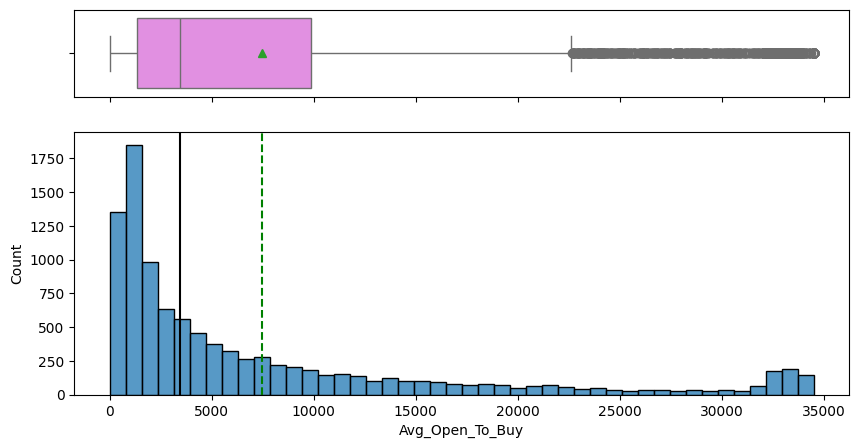

In [127]:
# Checking the amount left on the credit card to use
histogram_boxplot(df,'Avg_Open_To_Buy', figsize=(10,5), discrete=True)

- *Averaged value the amount left on the credit card to use is 7469.1 dollars, the distribution is right-skewed.*

**Let's check some transactional distributions**

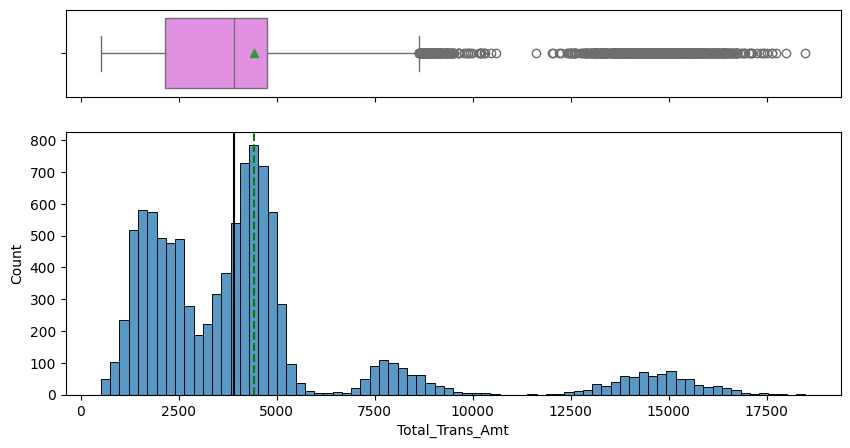

In [128]:
# Checking the total transaction amount distribution for last monts
histogram_boxplot(df,'Total_Trans_Amt', figsize=(10,5), discrete=True)

- *The distribution is 4-modal with no obvious dependence.*

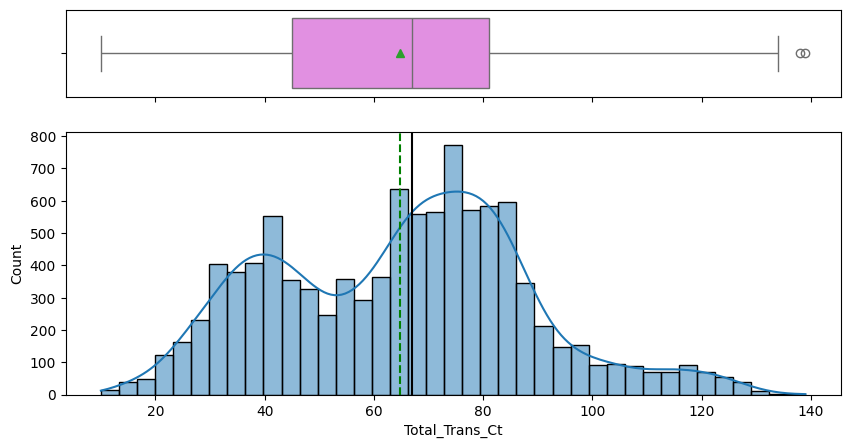

In [129]:
# Checking the total transaction count for last monts
histogram_boxplot(df,'Total_Trans_Ct', figsize=(10,5), discrete=True, kde=True)

- *The average total transaction is 65, the distribution is normal with two small modes because of the small numbers*

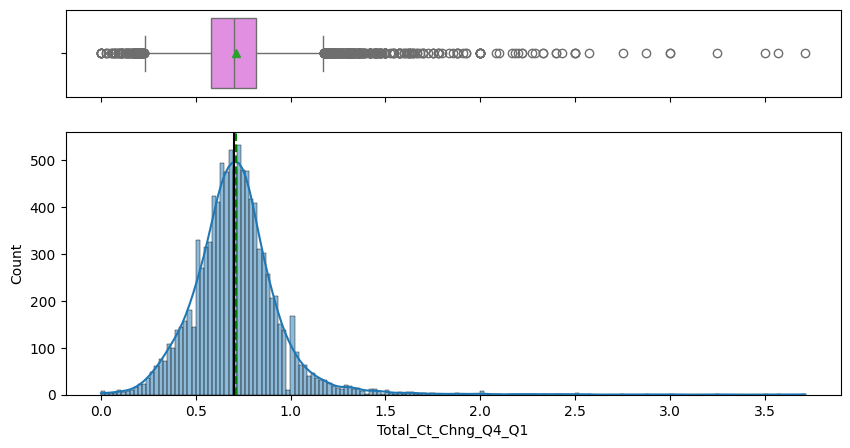

In [130]:
# Checking the ratio of the total transaction count in 4th quarter and the total transaction count in 1st quarter
histogram_boxplot(df,'Total_Ct_Chng_Q4_Q1', figsize=(10,5), discrete=True, kde=True)

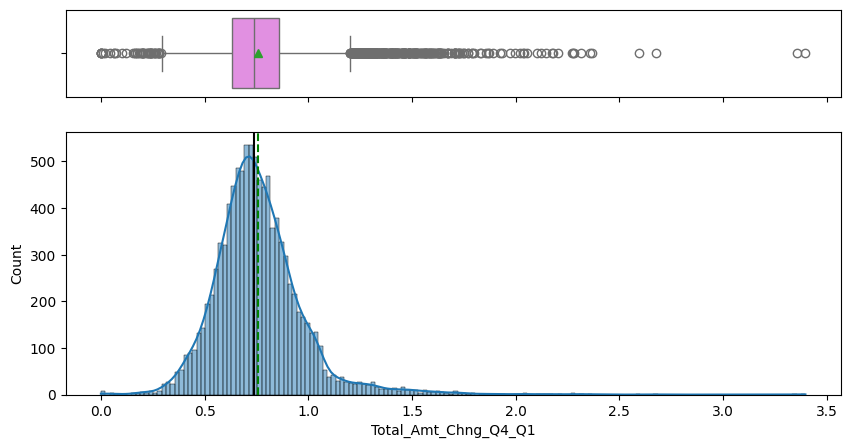

In [131]:
# Checking the ratio of the total transaction amount in 4th quarter and the total transaction amount in 1st quarter
histogram_boxplot(df,'Total_Amt_Chng_Q4_Q1', figsize=(10,5), discrete=True, kde=True)

- *The average ratio of the total transaction count/amount in the 4th quarter and the total transaction count/amount in the 1st quarter is 0.75, which means that amount of transactions is declining.*
- *The distribution is normal, the outliers does not contribute changing the distribution's shape.*

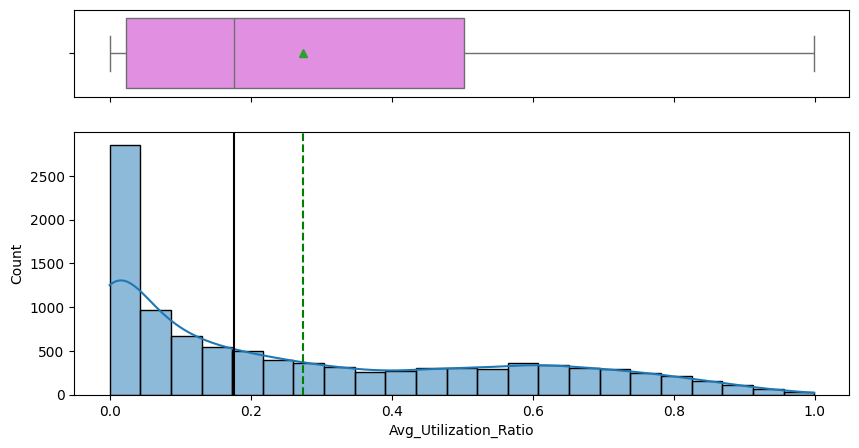

In [132]:
# Checking how much of the available credit the customer spent
histogram_boxplot(df,'Avg_Utilization_Ratio', figsize=(10,5), discrete=True, kde=True)

- *The distribution is normal, right-skewed with averaged value is 0.3.*

### Bitivariate analysis

**Let's check some multivariate relationships with Attrititon_Flag variables**

<Axes: xlabel='Attrition_Flag', ylabel='Customer_Age'>

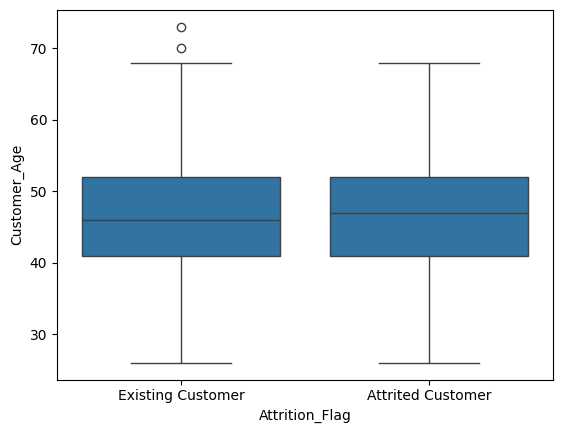

In [133]:
# Checking customer's age and attrition status
sns.boxplot(df, x = "Attrition_Flag", y = "Customer_Age")

- *The average age for existing and attrited customers is almost the same about 46 year.*

Gender                F     M    All
Attrition_Flag                      
All                5358  4769  10127
Existing Customer  4428  4072   8500
Attrited Customer   930   697   1627
------------------------------------------------------------------------------------------------------------------------


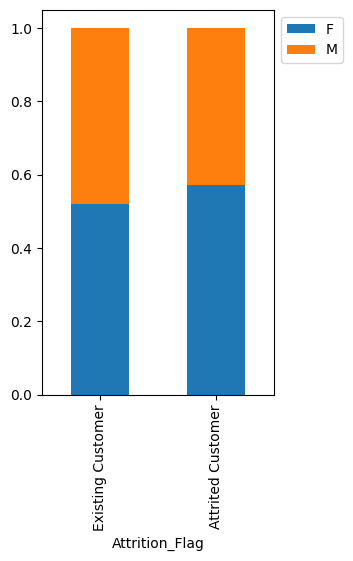

In [134]:
# Checking customer's gender and attrition status
stacked_barplot(df, "Attrition_Flag", "Gender")

- *Gender distribution between existing and attrited customers has almost equal proportion.*

Dependent_count      0     1     2     3     4    5    All
Attrition_Flag                                            
All                904  1838  2655  2732  1574  424  10127
Existing Customer  769  1569  2238  2250  1314  360   8500
Attrited Customer  135   269   417   482   260   64   1627
------------------------------------------------------------------------------------------------------------------------


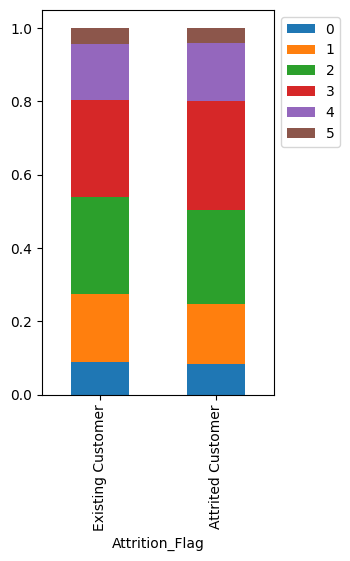

In [135]:
# Checking customer's Dependent_count and attrition status
stacked_barplot(df, "Attrition_Flag", "Dependent_count")

- *Dependent's distribution for existing and attrited customers has almost equal.*

Education_Level    College  Doctorate  Graduate  High School  Post-Graduate  \
Attrition_Flag                                                                
All                   1013        451      3128         2013            516   
Existing Customer      859        356      2641         1707            424   
Attrited Customer      154         95       487          306             92   

Education_Level    Uneducated   All  
Attrition_Flag                       
All                      1487  8608  
Existing Customer        1250  7237  
Attrited Customer         237  1371  
------------------------------------------------------------------------------------------------------------------------


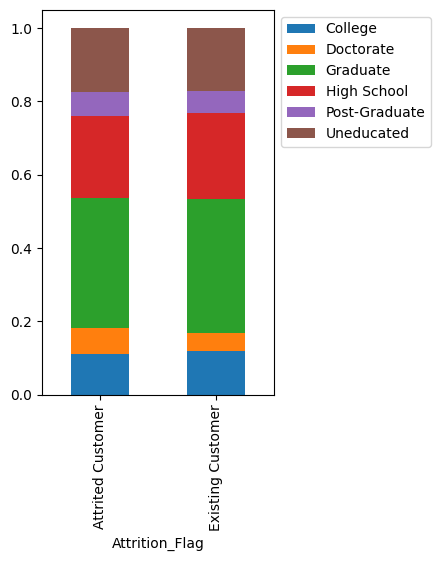

In [136]:
# Checking customer's education level and attrition status
stacked_barplot(df, "Attrition_Flag", "Education_Level")

- *Gender distribution between existing and attrited customers has almost equal proportion.*

Marital_Status     Divorced  Married  Single   All
Attrition_Flag                                    
All                     748     4687    3943  9378
Existing Customer       627     3978    3275  7880
Attrited Customer       121      709     668  1498
------------------------------------------------------------------------------------------------------------------------


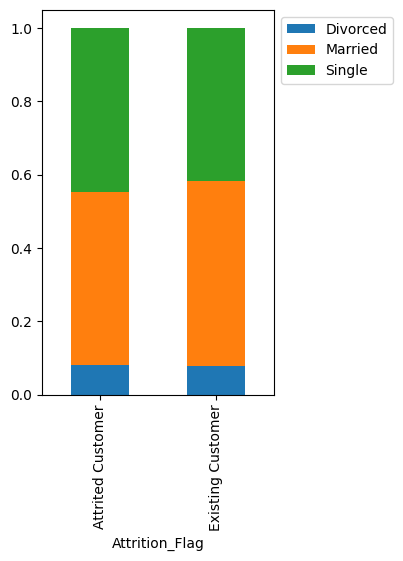

In [137]:
# Checking customer's marital status and attrition status
stacked_barplot(df, "Attrition_Flag", "Marital_Status")

- *Marital status distribution between existing and attrited customers has almost equal proportion.*

Income_Category    $120K +  $40K - $60K  $60K - $80K  $80K - $120K  \
Attrition_Flag                                                       
All                    727         1790         1402          1535   
Existing Customer      601         1519         1213          1293   
Attrited Customer      126          271          189           242   

Income_Category    Less than $40K   abc    All  
Attrition_Flag                                  
All                          3561  1112  10127  
Existing Customer            2949   925   8500  
Attrited Customer             612   187   1627  
------------------------------------------------------------------------------------------------------------------------


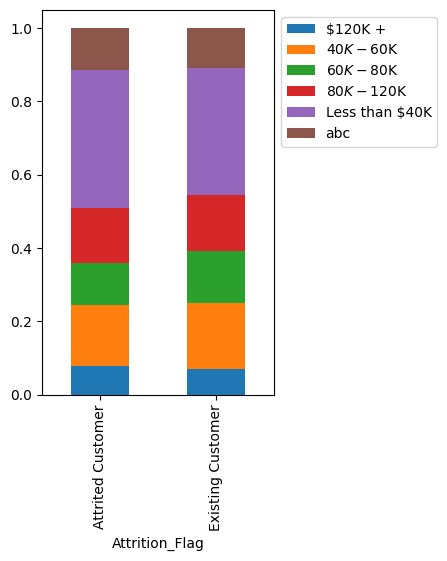

In [138]:
# Checking customer's income and attrition status
stacked_barplot(df, "Attrition_Flag", "Income_Category")

- *Incomes distribution between existing and attrited customers has almost equal proportion.*

Card_Category      Blue  Gold  Platinum  Silver    All
Attrition_Flag                                        
All                9436   116        20     555  10127
Existing Customer  7917    95        15     473   8500
Attrited Customer  1519    21         5      82   1627
------------------------------------------------------------------------------------------------------------------------


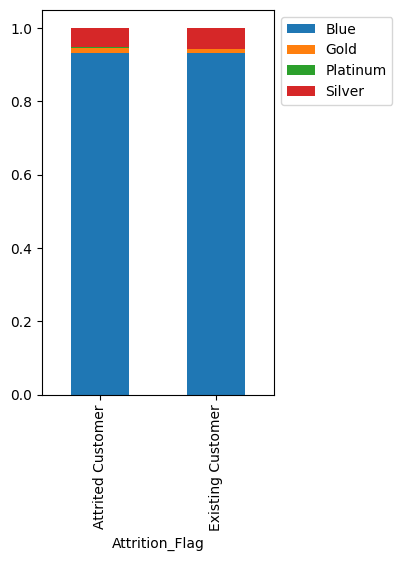

In [139]:
# Checking customer's cards and attrition status
stacked_barplot(df, "Attrition_Flag", "Card_Category")

- *Card's type distribution between existing and attrited customers has almost equal proportion.*

<Axes: xlabel='Attrition_Flag', ylabel='Months_on_book'>

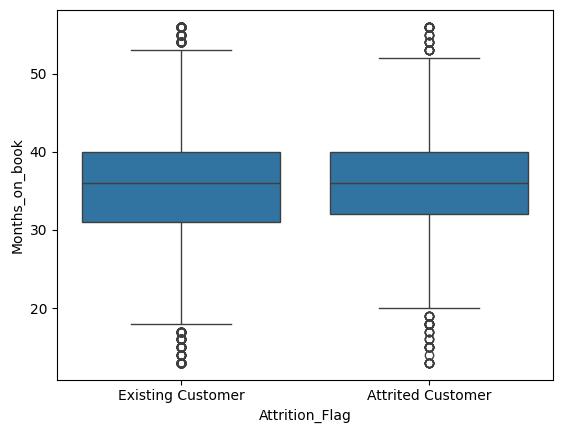

In [140]:
# Checking period of relationship with the bank and attrition status
sns.boxplot(df, x = "Attrition_Flag", y = "Months_on_book")

- *The average period of relationship with the bank for existing and attrited customers has almost the same value.*

<Axes: xlabel='Attrition_Flag', ylabel='Total_Relationship_Count'>

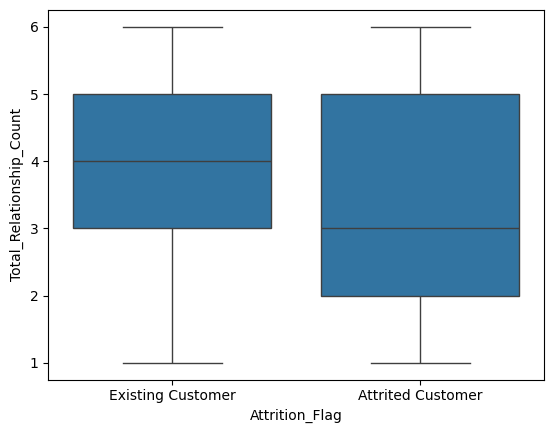

In [141]:
# Checking period no. of products held by the customer and attrition status
sns.boxplot(df, x = "Attrition_Flag", y = "Total_Relationship_Count")

- *The average number of products held by existing customers is one time greater than attrited.*
- *The distribution for addried customers is right-skewed.*

<Axes: xlabel='Attrition_Flag', ylabel='Credit_Limit'>

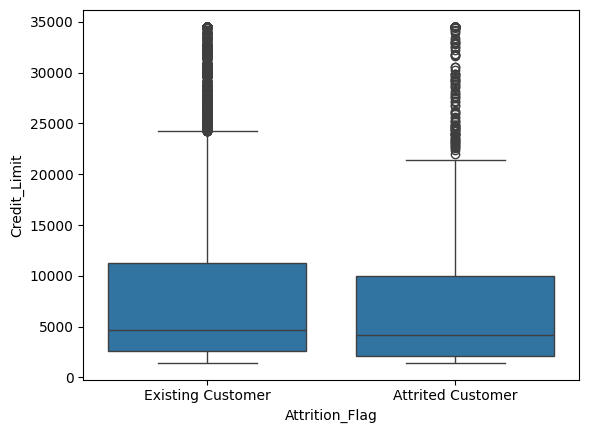

In [142]:
# Checking the credit Limit on the Credit Card and attrition status
sns.boxplot(df, x = "Attrition_Flag", y = "Credit_Limit")

- *The average number of credit limit for existing and attrited customers has almost the same value.*

<Axes: xlabel='Total_Revolving_Bal', ylabel='Attrition_Flag'>

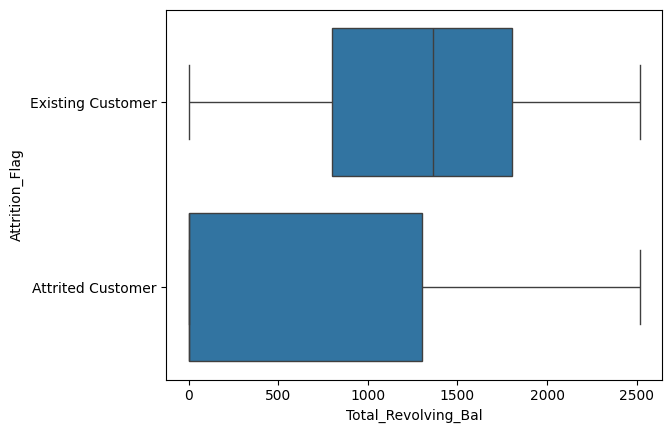

In [143]:
# Checking the total revolving balance and attrition status
sns.boxplot(df, y= "Attrition_Flag", x = "Total_Revolving_Bal")

- *The distribution of revolving balanse for attrited customers is right-skewed, for existing customers is symmetric.*

***

<Axes: xlabel='Avg_Open_To_Buy', ylabel='Attrition_Flag'>

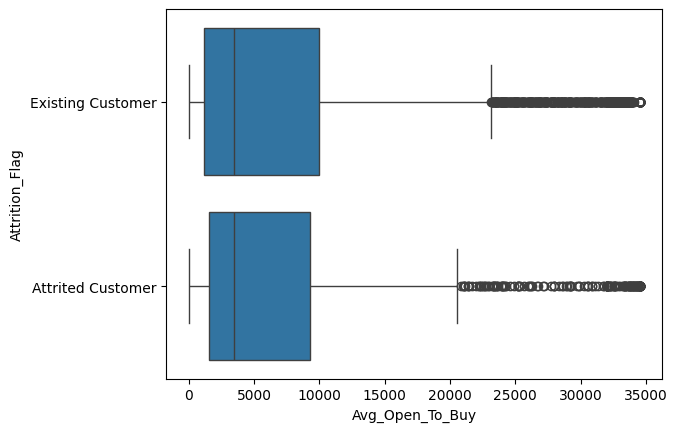

In [144]:
# Checking the refers to the amount left on the credit and attrition status
sns.boxplot(df, y= "Attrition_Flag", x = "Avg_Open_To_Buy")

- *The distribution of the refers to the amount left on the credit is right-skewed, for existing and attrited customers is right-skewed.*

<Axes: xlabel='Total_Trans_Amt', ylabel='Attrition_Flag'>

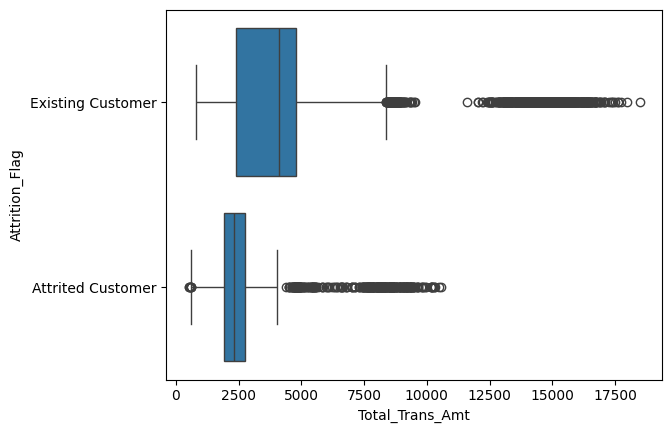

In [145]:
# Checking the total transaction amount and attrition status
sns.boxplot(df, y= "Attrition_Flag", x = "Total_Trans_Amt")

- *The distribution the total transaction amount and attrition status is left-skewed with right outliers for existing customers, the distribution the total transaction amount and attrition status is symmetric with right outliers for attried customers.*
- *The average of total amount of transactions is higher for existing customers.*

<Axes: xlabel='Total_Trans_Ct', ylabel='Attrition_Flag'>

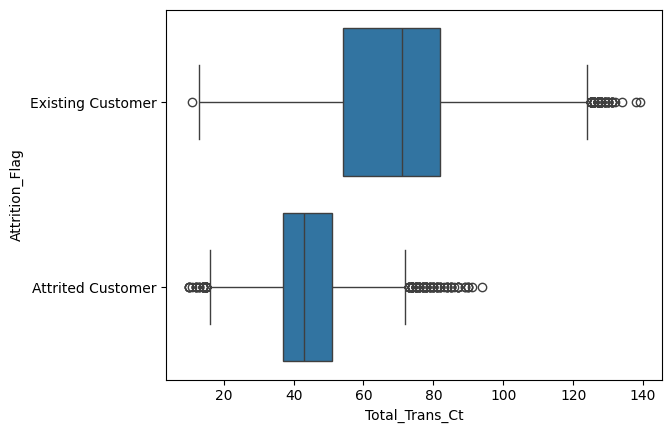

In [146]:
# Checking the total transaction count and attrition status
sns.boxplot(df, y= "Attrition_Flag", x = "Total_Trans_Ct")

- *The distribution the total transaction count and attrition status is left-skewed with right outliers for existing customers, the distribution the total transaction count and attrition status is symmetric with left and right outliers for attrited customers.*
- *The average of total count of transactions is higher for existing customers.*

<Axes: xlabel='Total_Ct_Chng_Q4_Q1', ylabel='Attrition_Flag'>

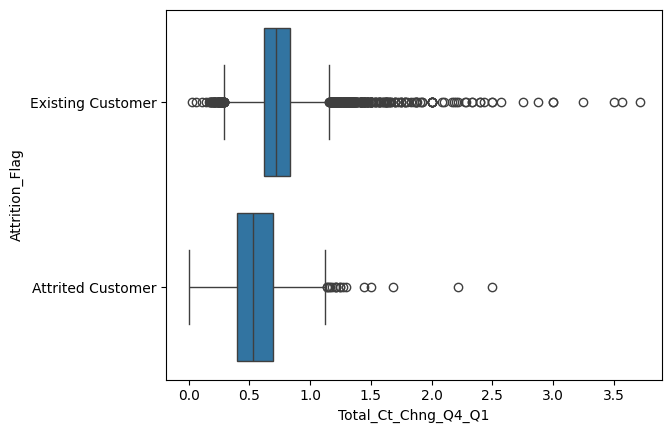

In [147]:
# Checking the ratio of the total transaction count between 1 - 4th quarters and attrition status
sns.boxplot(df, y= "Attrition_Flag", x = "Total_Ct_Chng_Q4_Q1")

- *The average of the ratio of the total transaction count between 1 - 4th quarters is higher for existing customers.*

<Axes: xlabel='Total_Amt_Chng_Q4_Q1', ylabel='Attrition_Flag'>

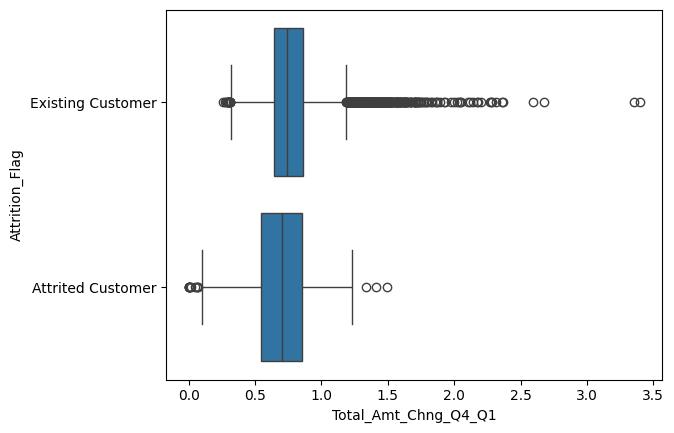

In [148]:
# Checking the ratio of the total transaction amount between 1 - 4th quarters and attrition status
sns.boxplot(df, y= "Attrition_Flag", x = "Total_Amt_Chng_Q4_Q1")

- *The average of the ratio of the total transaction amount between 1 - 4th quarters is almost the same for existing and attrited customers and shifted right due to the right side outliers.*

<Axes: xlabel='Avg_Utilization_Ratio', ylabel='Attrition_Flag'>

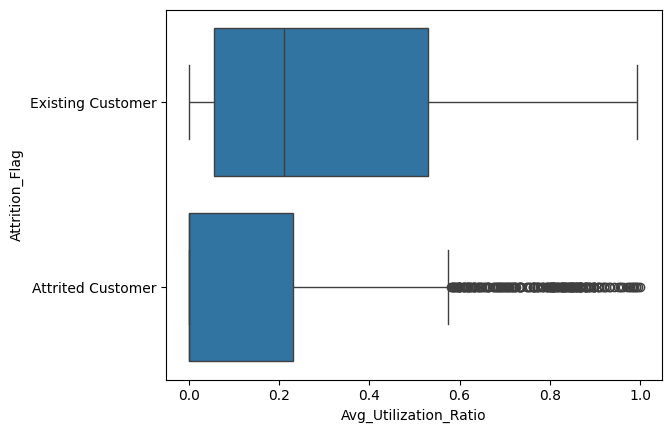

In [149]:
# Checking the available credit the customer spent and attrition status
sns.boxplot(df, y= "Attrition_Flag", x = "Avg_Utilization_Ratio")

- *The distribution of revolving balanse for attrited customers is right-skewed with outliers, for existing customers is slightly left-skewed.*

### To jump back to the EDA quick observation section, click <a href = #link2>here</a>.